In [1]:
from msibi import MSIBI, State, Pair, Bond, Angle, mie
import gsd
import gsd.hoomd
import time

In [2]:
%%bash

for dir in "states" "rdfs" "potentials"
do
    if [ -d $dir ]
    then
        rm -r $dir
    fi
done

In [3]:
%%bash
ls

CG_80_10mers_2.0kT.gsd
CG_80_10mers_5.0kT.gsd
CG_80_10mers_9.0kT.gsd
peek_msibi.ipynb


In [4]:
cg_traj_files = [
    "CG_80_10mers_2.0kT.gsd",
    "CG_80_10mers_5.0kT.gsd",
    "CG_80_10mers_9.0kT.gsd"
]

In [5]:
opt = MSIBI(
    rdf_cutoff=5.0,
    n_rdf_points=101,
    max_frames=5,
    pot_cutoff=5.0,
    smooth_rdfs=True,
    rdf_exclude_bonded=True,
    verbose=True
)

## Add States

In [6]:
opt.add_state(
    State(name="A", kT=2.0, traj_file=cg_traj_files[0], alpha=0.50)
)
opt.add_state(
    State(name="B", kT=5.0, traj_file=cg_traj_files[1], alpha=0.30)
)
opt.add_state(
    State(name="C", kT=9.0, traj_file=cg_traj_files[2], alpha=0.20)
)

## Add Pairs

In [7]:
initial_guess = mie(opt.pot_r, 1.0, 1.0)
opt.add_pair(Pair(type1="P", type2="P", potential=initial_guess))
opt.add_pair(Pair(type1="M", type2="M", potential=initial_guess))
opt.add_pair(Pair(type1="P", type2="M", potential=initial_guess))

## Add Bonds

In [8]:
opt.add_bond(Bond(type1="P", type2="M", k=100, r0=3.4))

## Add Angles

In [9]:
opt.add_angle(Angle(type1="P", type2="M", type3="P", k=5, theta=2.0))
opt.add_angle(Angle(type1="M", type2="P", type3="M", k=5, theta=2.0))

## Run Optimization Iterations

Using HOOMD version 2.
-------- Iteration 0 --------
Running state A on GPU
Launched HOOMD in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/A_2.0
Finished in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/A_2.0.
Running state B on GPU
Launched HOOMD in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/B_5.0
Finished in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/B_5.0.
Running state C on GPU
Launched HOOMD in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/C_9.0
Finished in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/C_9.0.


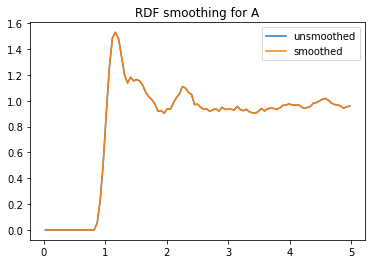

pair P-P, state A, iteration 0: 0.903990


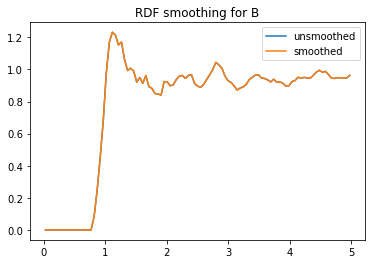

pair P-P, state B, iteration 0: 0.921900


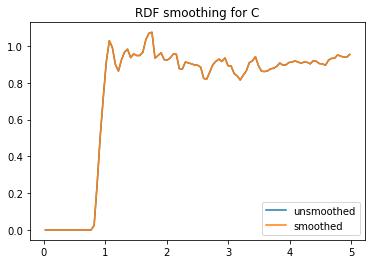

pair P-P, state C, iteration 0: 0.908161


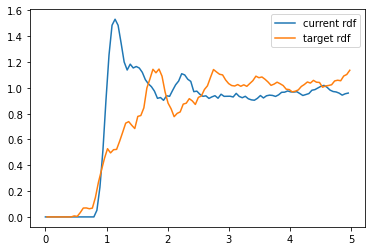

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


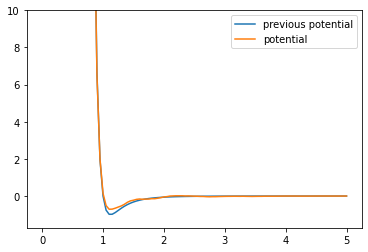

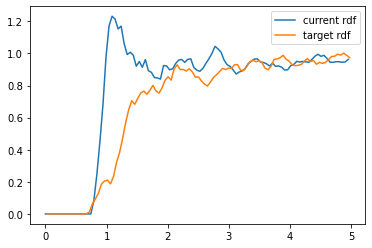

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


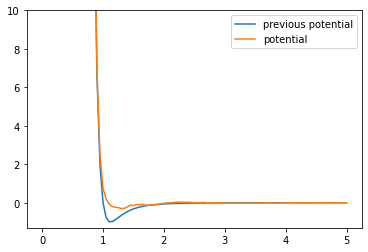

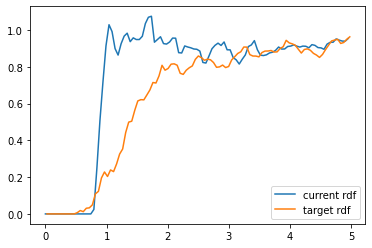

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


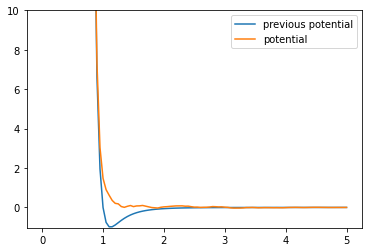

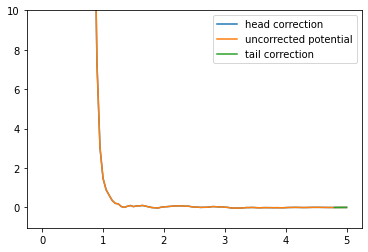

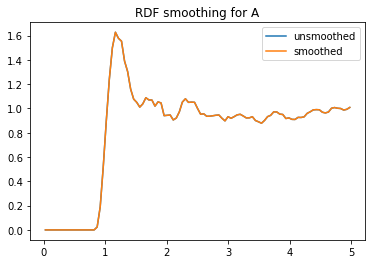

pair M-M, state A, iteration 0: 0.905741


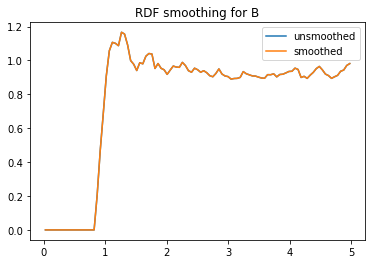

pair M-M, state B, iteration 0: 0.917196


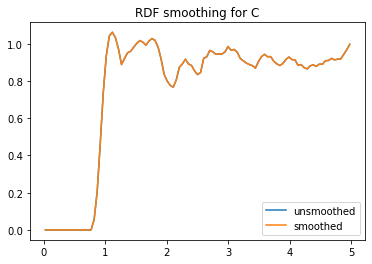

pair M-M, state C, iteration 0: 0.910092


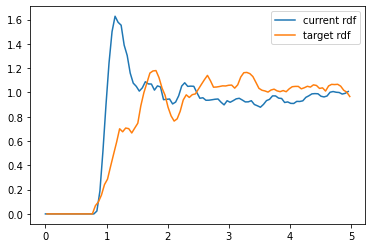

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


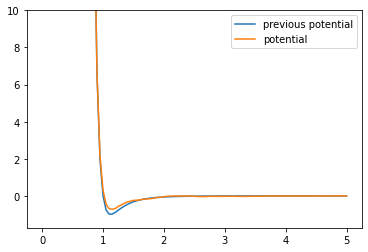

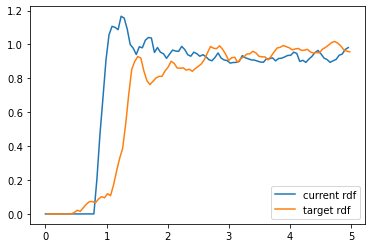

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


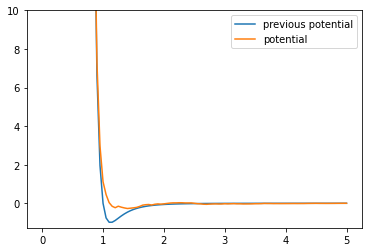

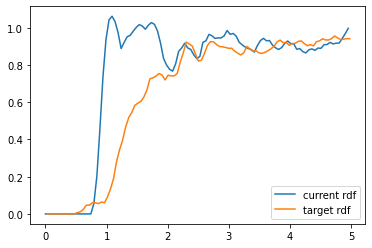

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


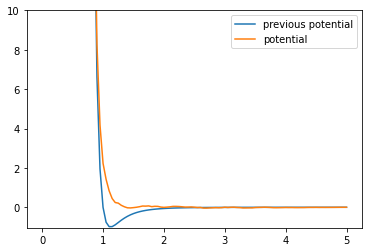

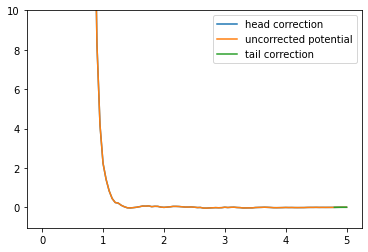

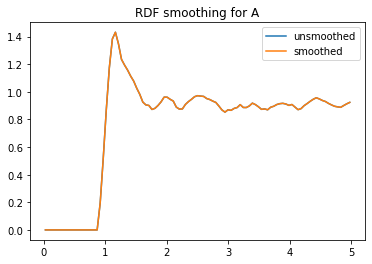

pair P-M, state A, iteration 0: 0.925224


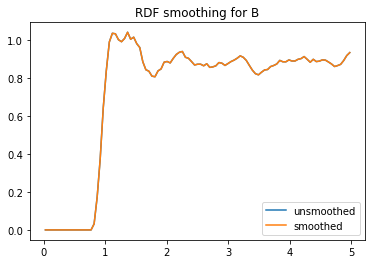

pair P-M, state B, iteration 0: 0.928098


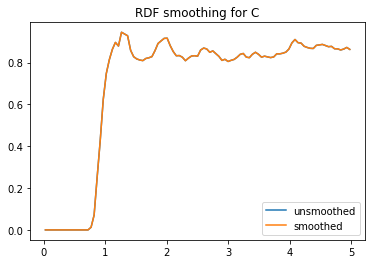

pair P-M, state C, iteration 0: 0.914902


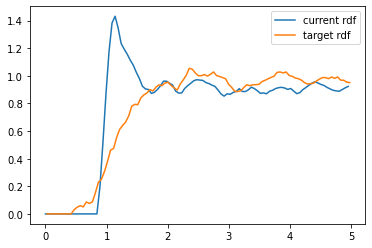

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


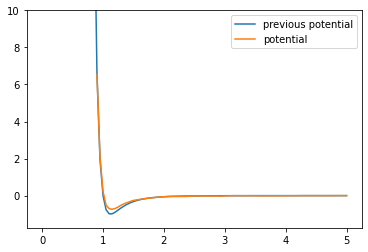

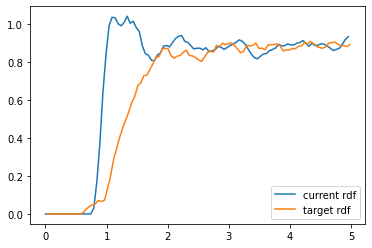

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


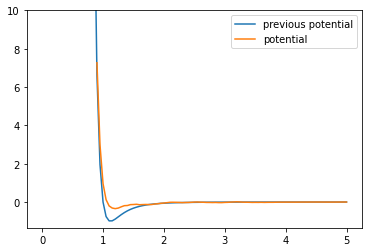

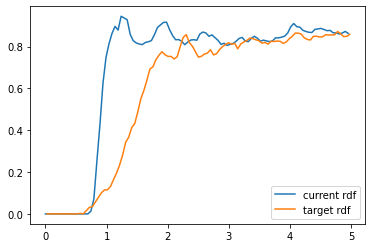

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


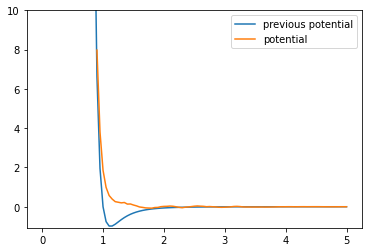

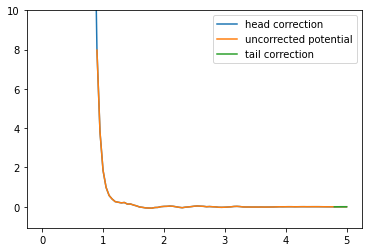

-------- Iteration 1 --------
Running state A on GPU
Launched HOOMD in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/A_2.0
Finished in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/A_2.0.
Running state B on GPU
Launched HOOMD in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/B_5.0
Finished in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/B_5.0.
Running state C on GPU
Launched HOOMD in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/C_9.0
Finished in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/C_9.0.


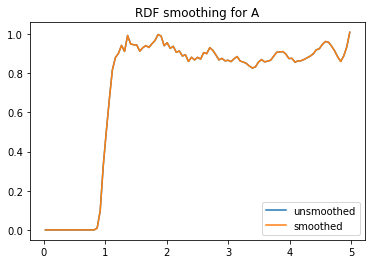

pair P-P, state A, iteration 1: 0.914871


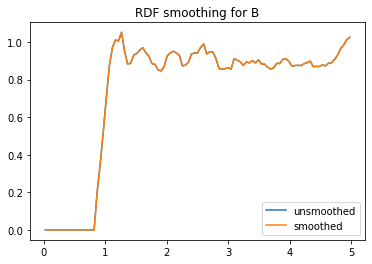

pair P-P, state B, iteration 1: 0.926262


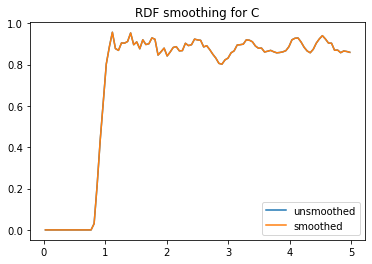

pair P-P, state C, iteration 1: 0.919912


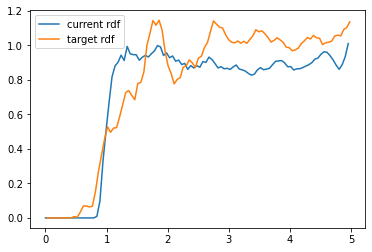

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


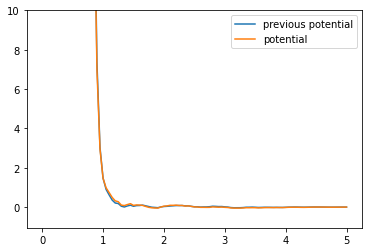

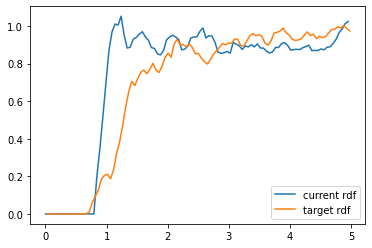

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


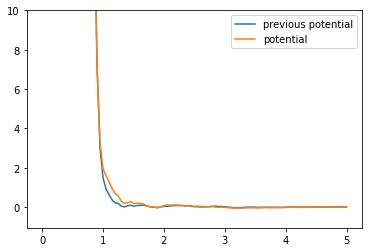

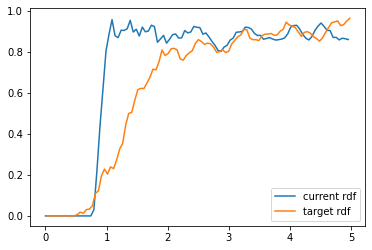

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


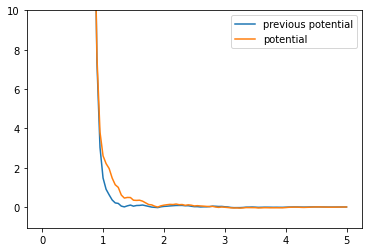

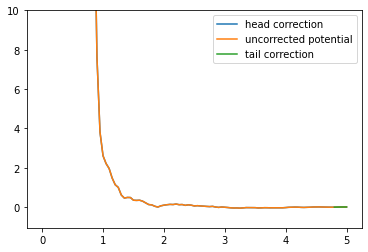

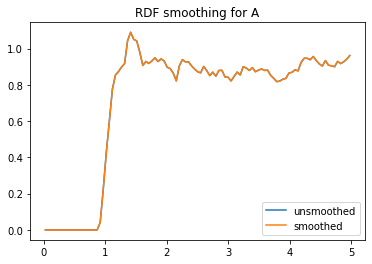

pair M-M, state A, iteration 1: 0.909809


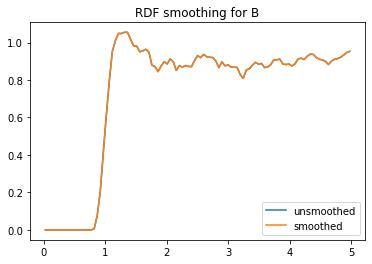

pair M-M, state B, iteration 1: 0.929013


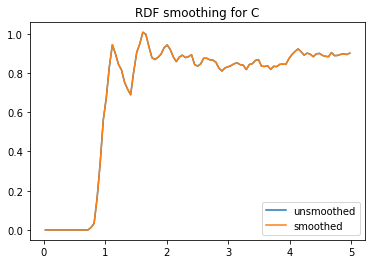

pair M-M, state C, iteration 1: 0.921041


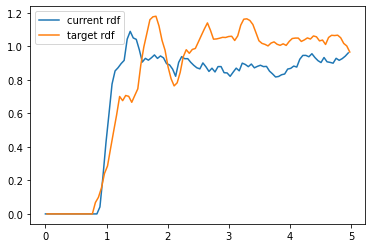

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


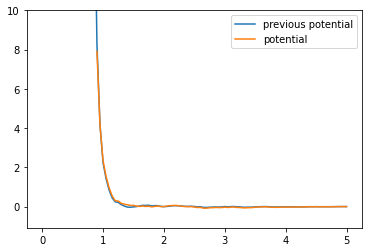

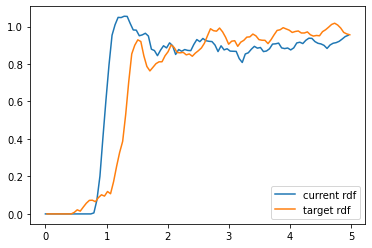

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


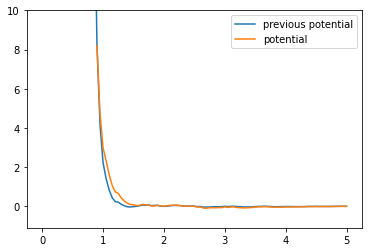

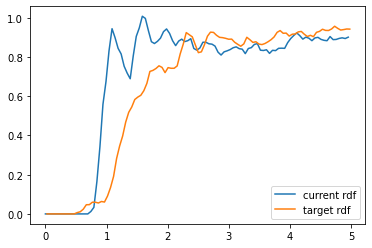

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


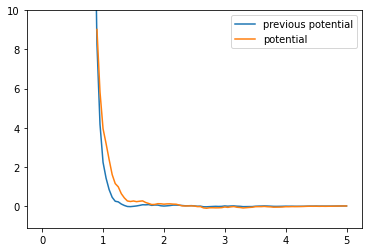

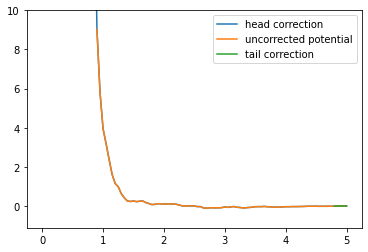

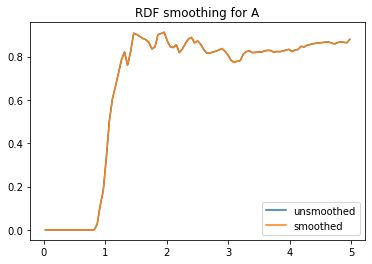

pair P-M, state A, iteration 1: 0.925889


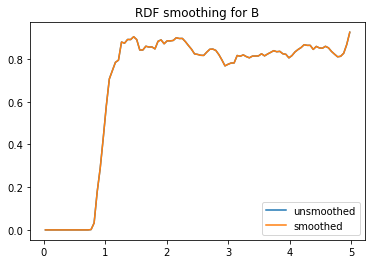

pair P-M, state B, iteration 1: 0.935241


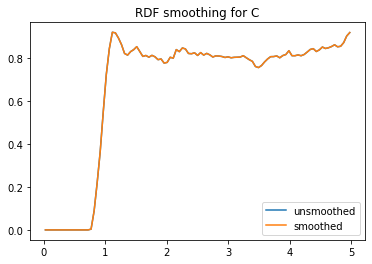

pair P-M, state C, iteration 1: 0.922655


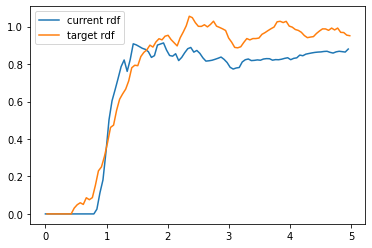

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


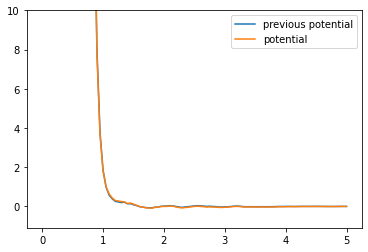

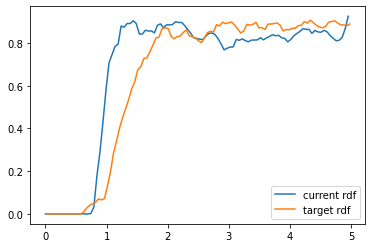

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


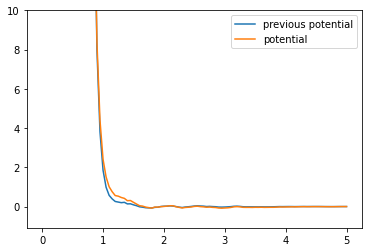

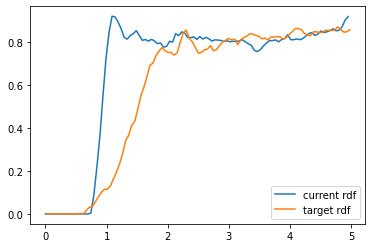

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


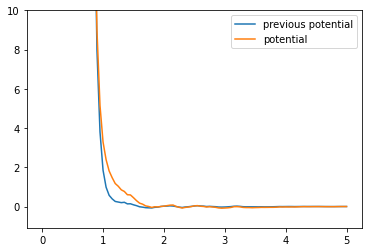

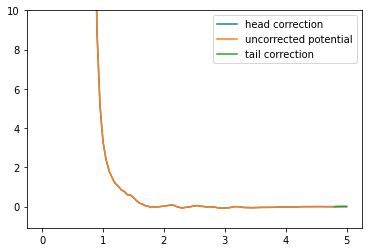

-------- Iteration 2 --------
Running state A on GPU
Launched HOOMD in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/A_2.0
Finished in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/A_2.0.
Running state B on GPU
Launched HOOMD in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/B_5.0
Finished in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/B_5.0.
Running state C on GPU
Launched HOOMD in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/C_9.0
Finished in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/C_9.0.


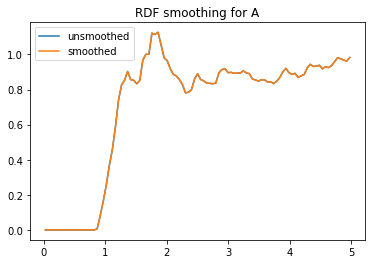

pair P-P, state A, iteration 2: 0.925722


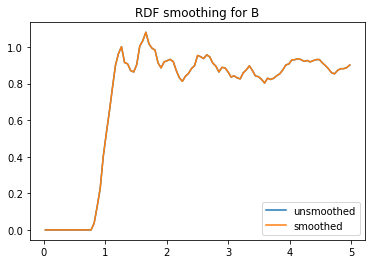

pair P-P, state B, iteration 2: 0.925368


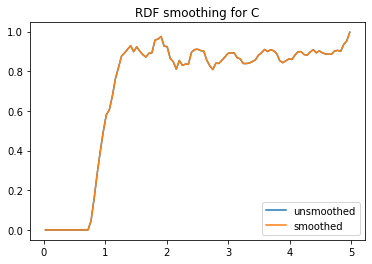

pair P-P, state C, iteration 2: 0.928870


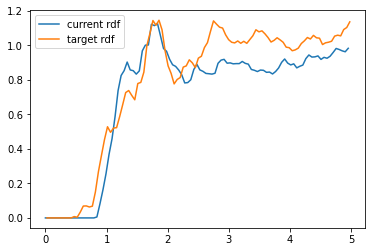

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


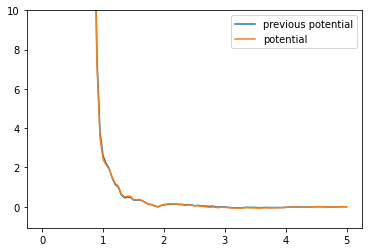

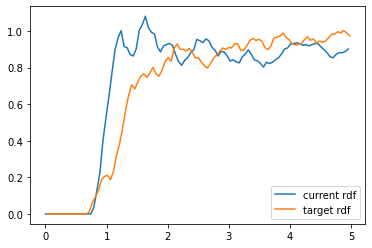

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


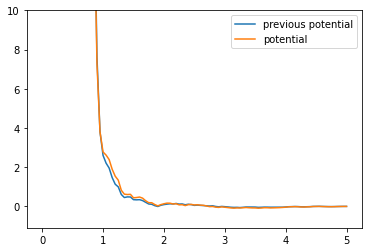

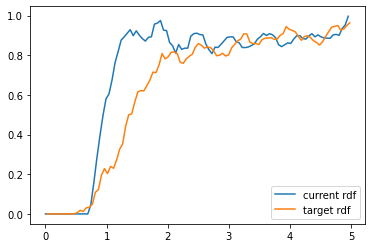

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


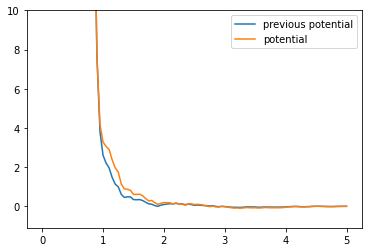

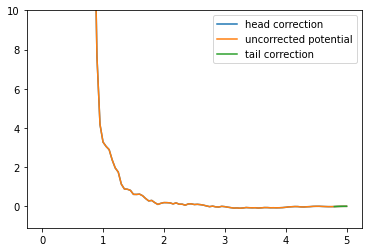

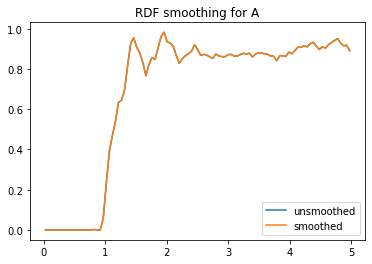

pair M-M, state A, iteration 2: 0.914839


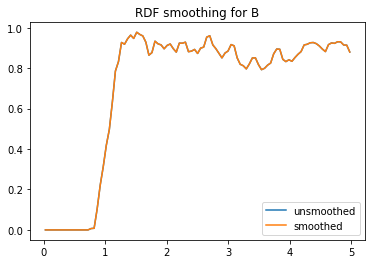

pair M-M, state B, iteration 2: 0.933091


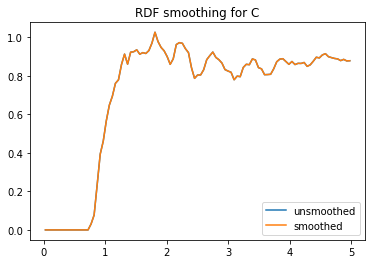

pair M-M, state C, iteration 2: 0.917360


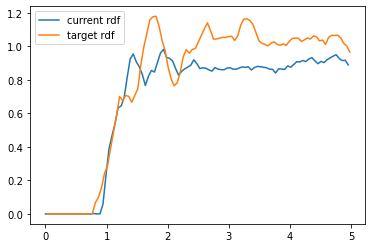

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


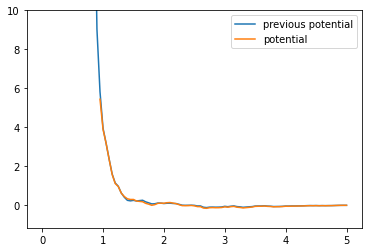

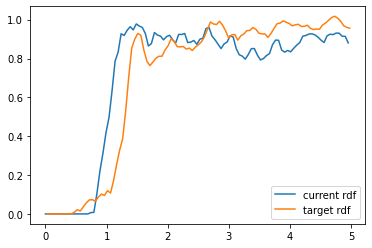

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


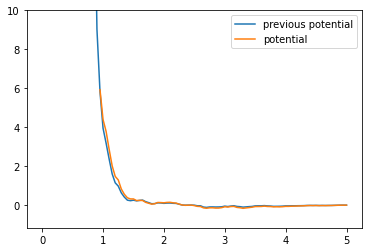

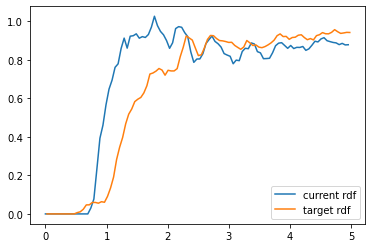

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


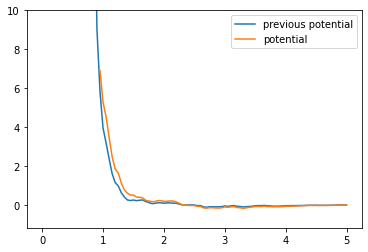

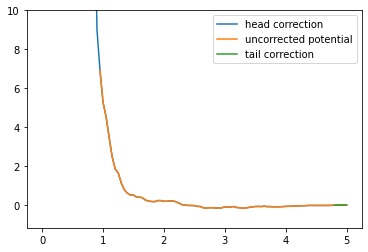

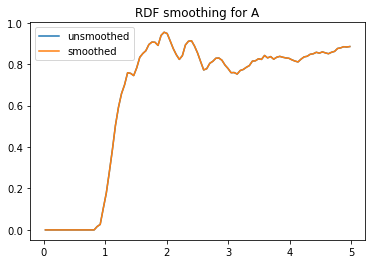

pair P-M, state A, iteration 2: 0.926378


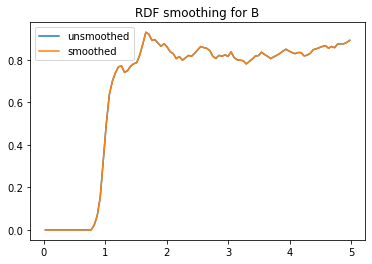

pair P-M, state B, iteration 2: 0.945439


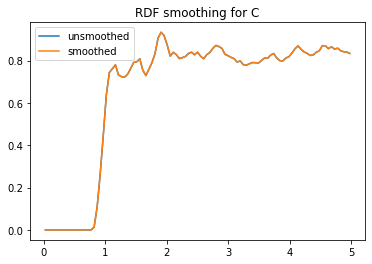

pair P-M, state C, iteration 2: 0.931123


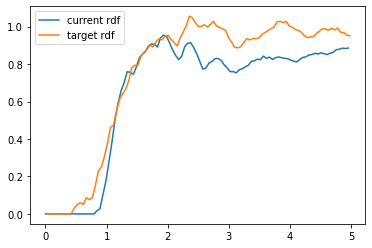

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


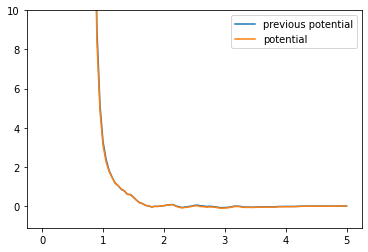

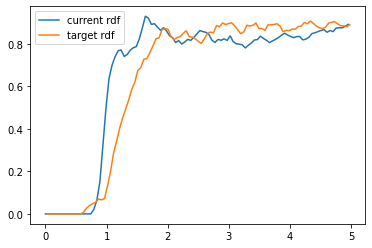

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


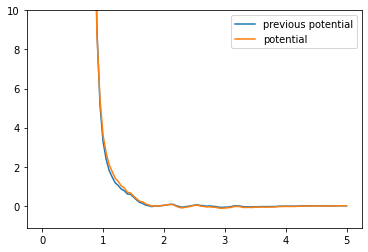

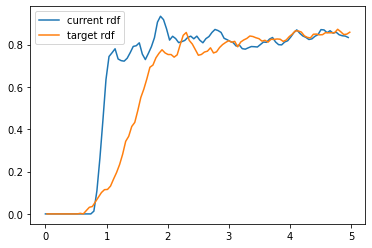

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


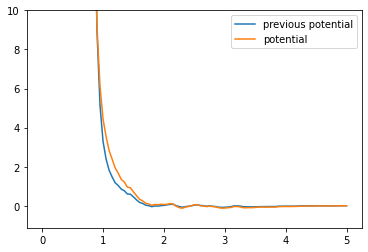

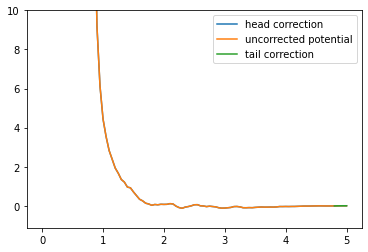

-------- Iteration 3 --------
Running state A on GPU
Launched HOOMD in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/A_2.0
Finished in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/A_2.0.
Running state B on GPU
Launched HOOMD in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/B_5.0
Finished in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/B_5.0.
Running state C on GPU
Launched HOOMD in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/C_9.0
Finished in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/C_9.0.


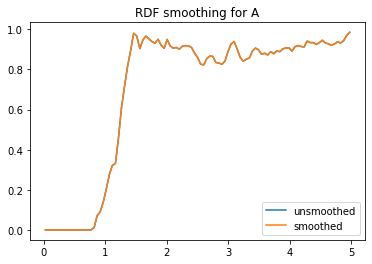

pair P-P, state A, iteration 3: 0.919211


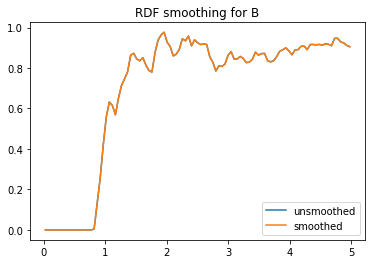

pair P-P, state B, iteration 3: 0.943341


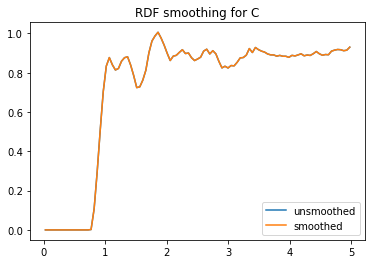

pair P-P, state C, iteration 3: 0.925411


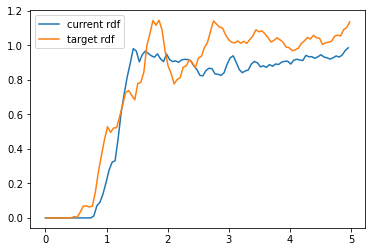

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


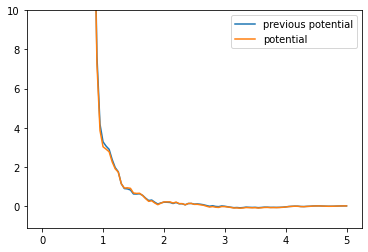

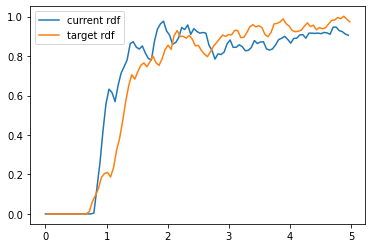

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


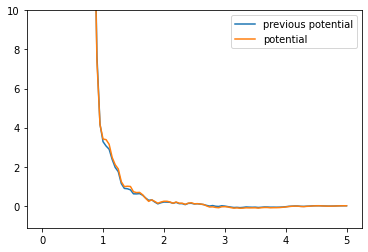

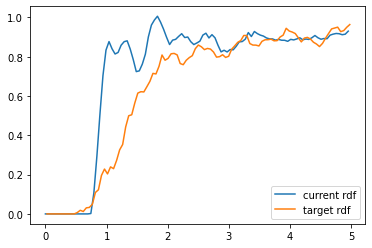

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


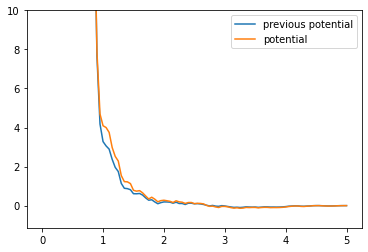

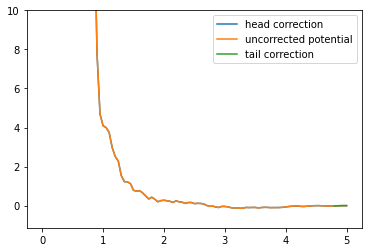

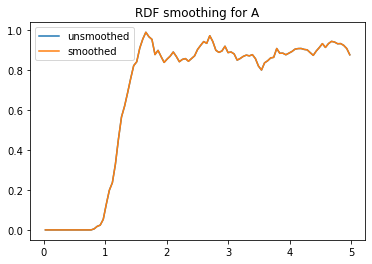

pair M-M, state A, iteration 3: 0.916652


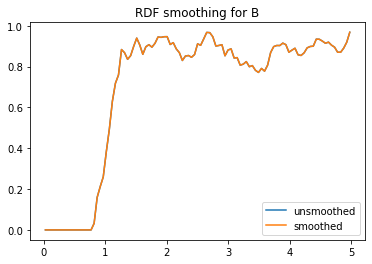

pair M-M, state B, iteration 3: 0.937786


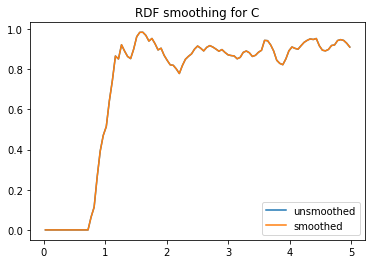

pair M-M, state C, iteration 3: 0.926591


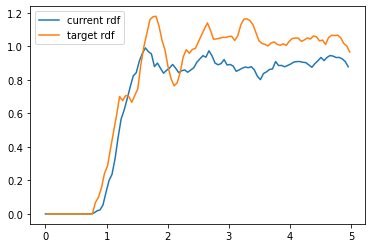

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


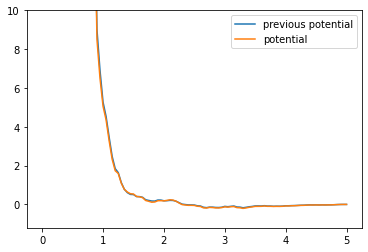

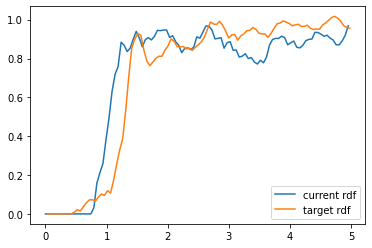

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


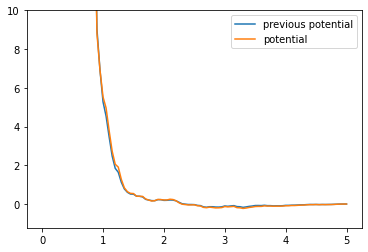

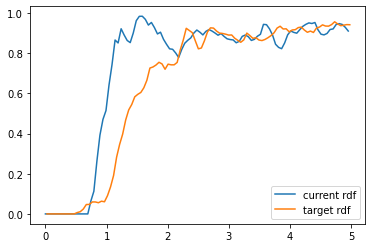

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


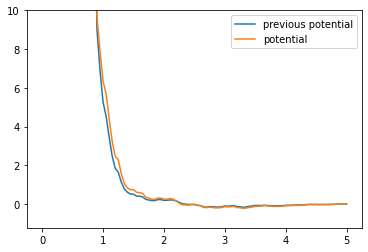

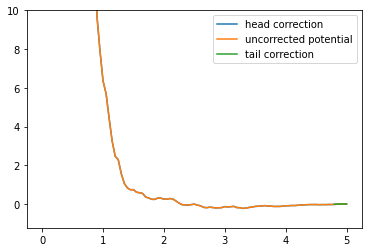

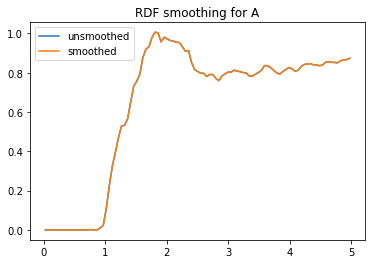

pair P-M, state A, iteration 3: 0.914293


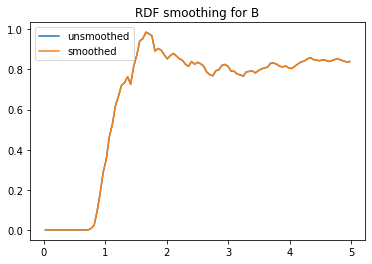

pair P-M, state B, iteration 3: 0.941413


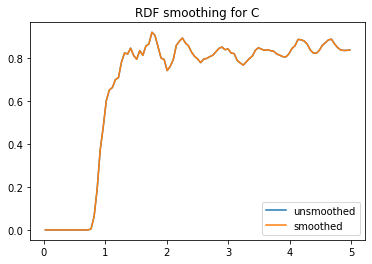

pair P-M, state C, iteration 3: 0.929575


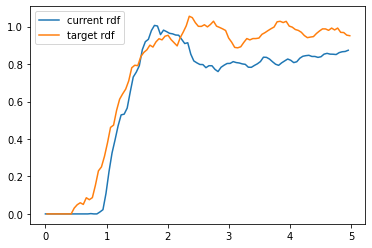

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


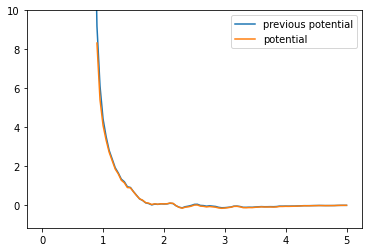

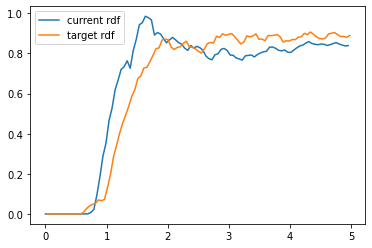

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


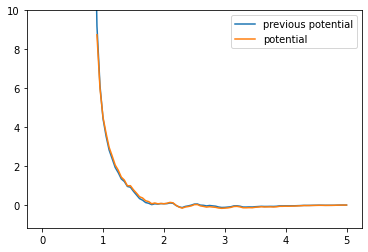

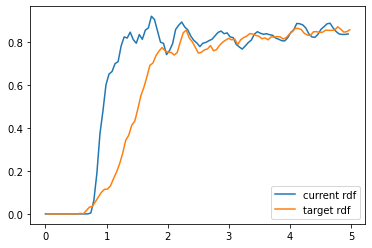

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


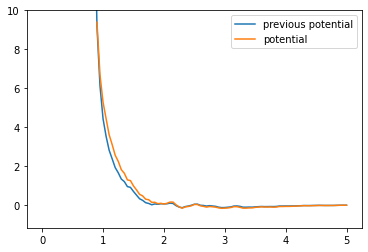

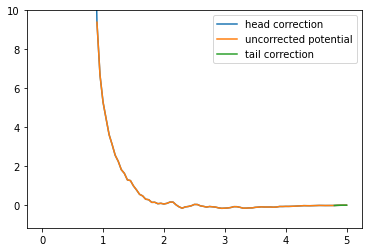

-------- Iteration 4 --------
Running state A on GPU
Launched HOOMD in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/A_2.0
Finished in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/A_2.0.
Running state B on GPU
Launched HOOMD in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/B_5.0
Finished in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/B_5.0.
Running state C on GPU
Launched HOOMD in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/C_9.0
Finished in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/C_9.0.


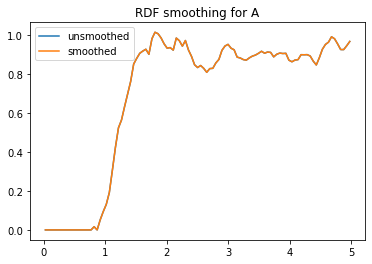

pair P-P, state A, iteration 4: 0.919892


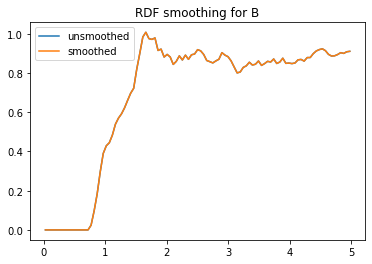

pair P-P, state B, iteration 4: 0.946612


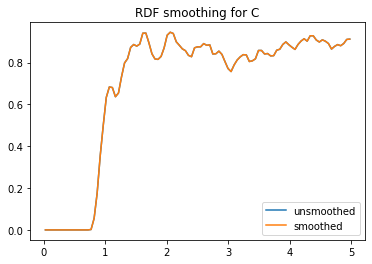

pair P-P, state C, iteration 4: 0.931456


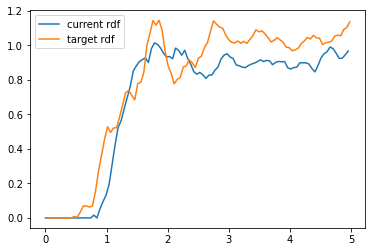

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


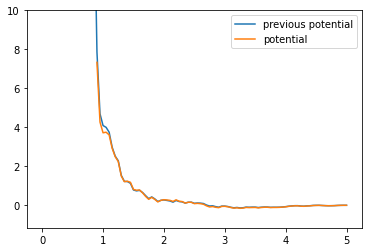

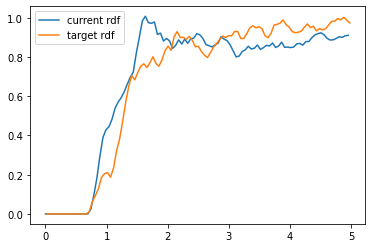

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


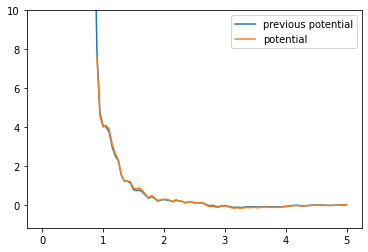

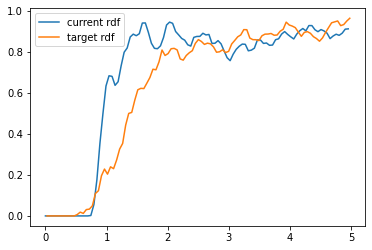

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


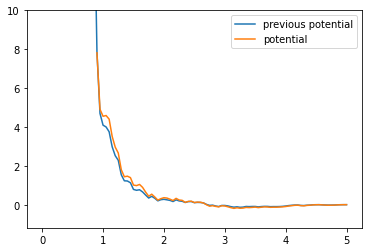

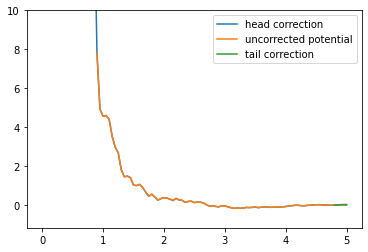

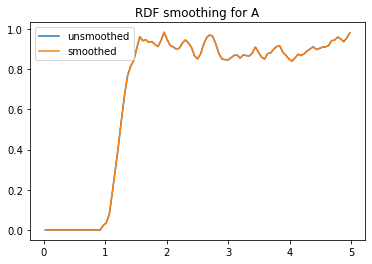

pair M-M, state A, iteration 4: 0.914052


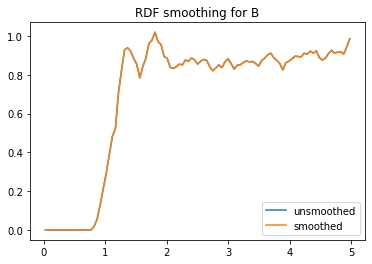

pair M-M, state B, iteration 4: 0.939710


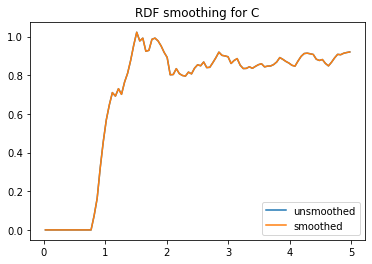

pair M-M, state C, iteration 4: 0.925062


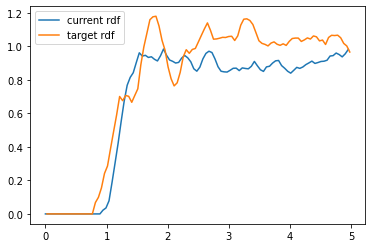

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


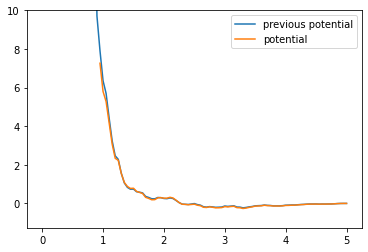

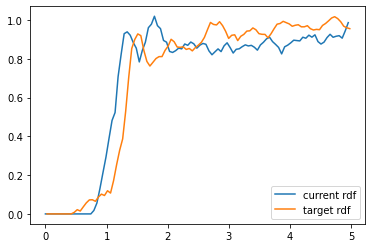

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


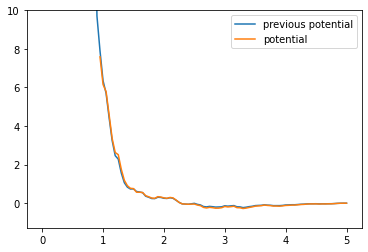

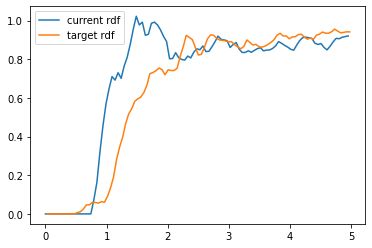

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


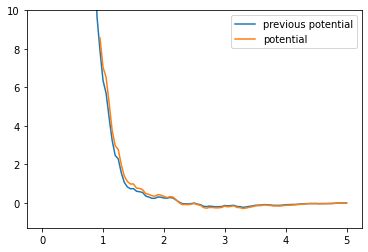

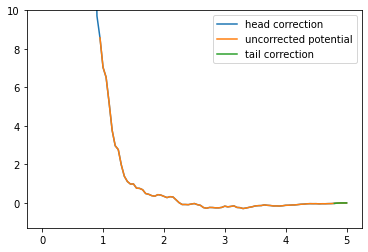

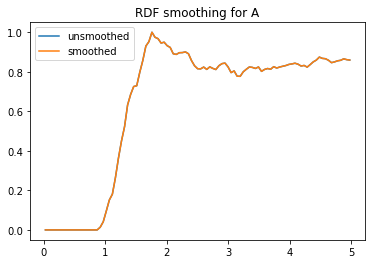

pair P-M, state A, iteration 4: 0.916029


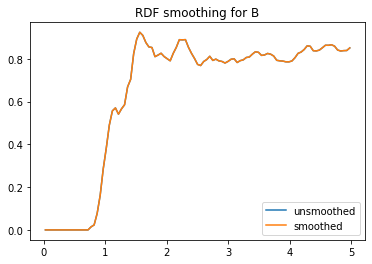

pair P-M, state B, iteration 4: 0.947964


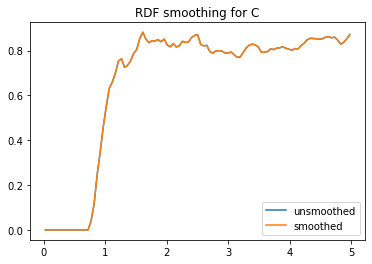

pair P-M, state C, iteration 4: 0.931262


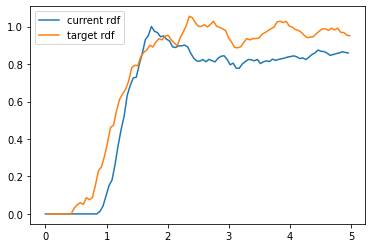

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


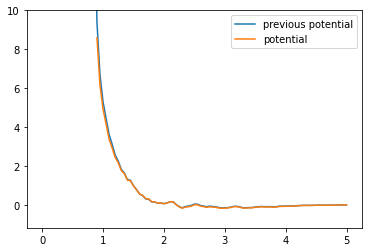

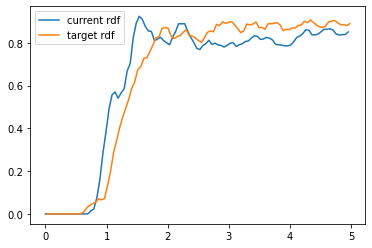

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


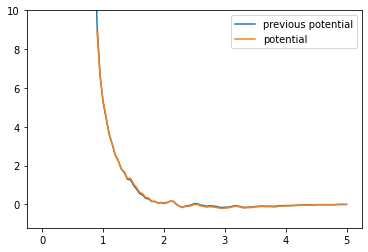

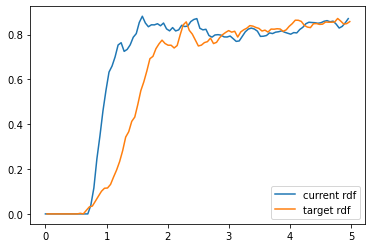

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


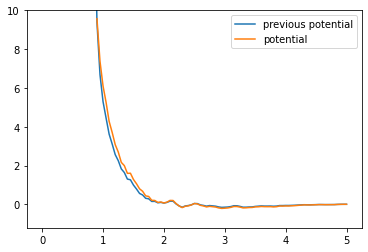

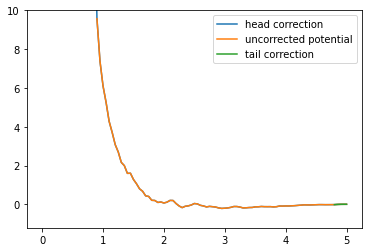

-------- Iteration 5 --------
Running state A on GPU
Launched HOOMD in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/A_2.0
Finished in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/A_2.0.
Running state B on GPU
Launched HOOMD in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/B_5.0
Finished in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/B_5.0.
Running state C on GPU
Launched HOOMD in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/C_9.0
Finished in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/C_9.0.


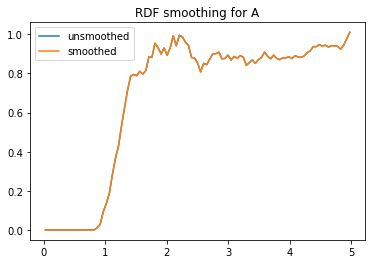

pair P-P, state A, iteration 5: 0.915292


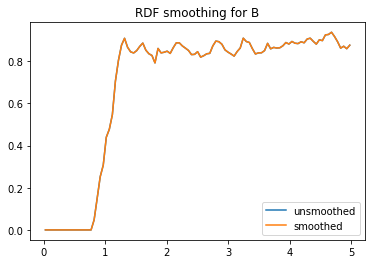

pair P-P, state B, iteration 5: 0.947168


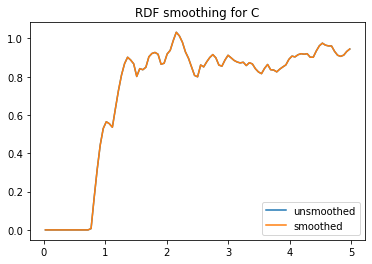

pair P-P, state C, iteration 5: 0.926179


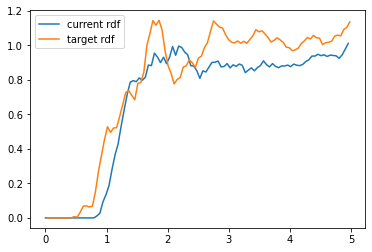

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


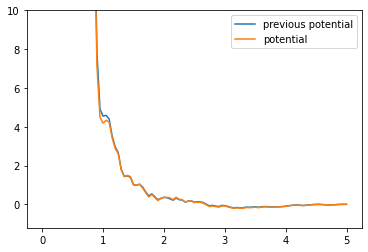

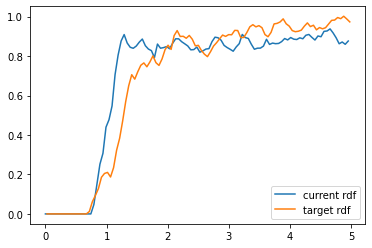

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


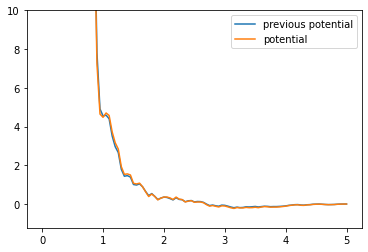

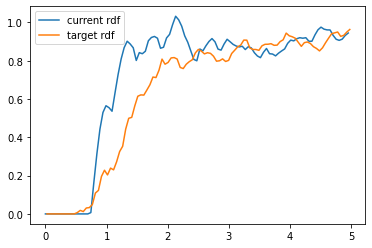

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


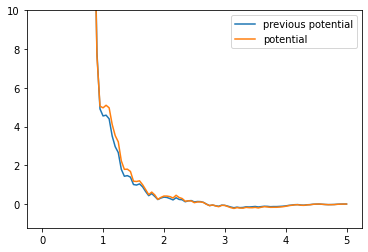

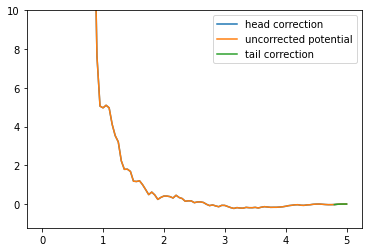

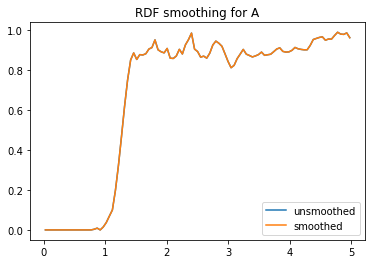

pair M-M, state A, iteration 5: 0.914738


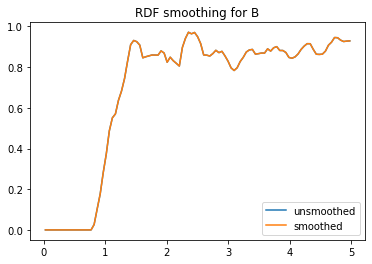

pair M-M, state B, iteration 5: 0.940901


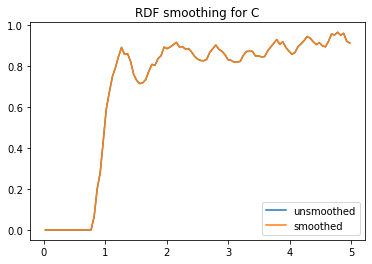

pair M-M, state C, iteration 5: 0.938733


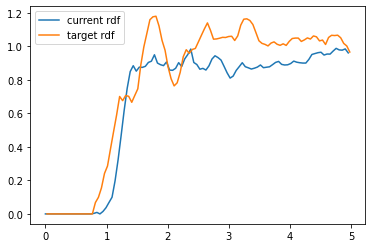

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


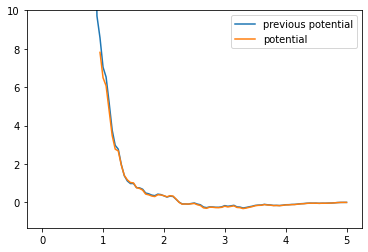

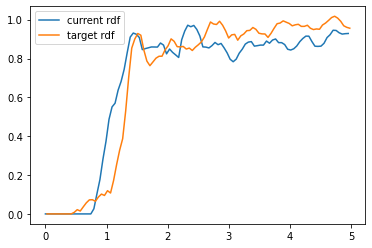

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


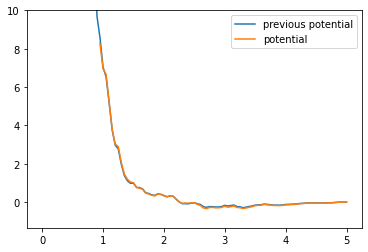

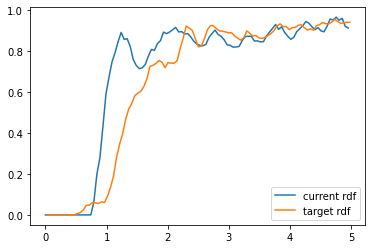

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


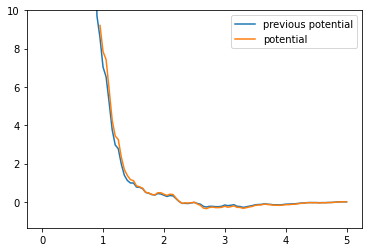

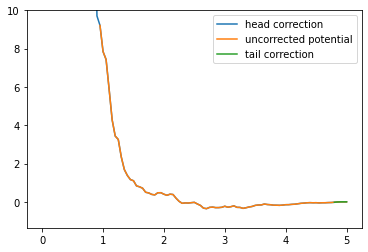

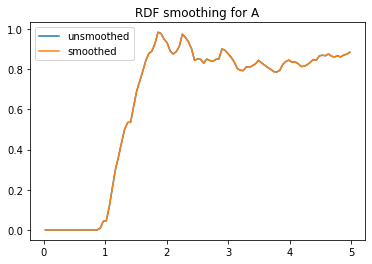

pair P-M, state A, iteration 5: 0.917899


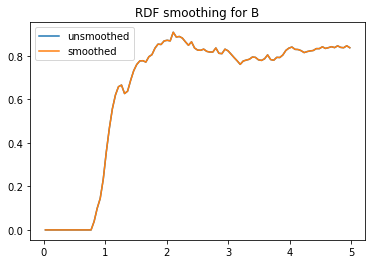

pair P-M, state B, iteration 5: 0.951258


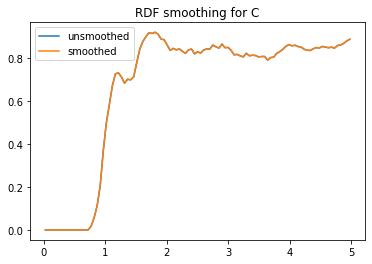

pair P-M, state C, iteration 5: 0.933155


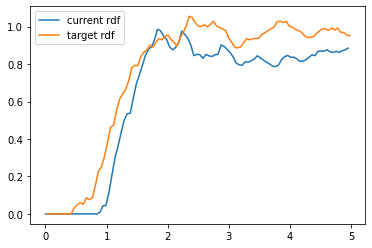

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


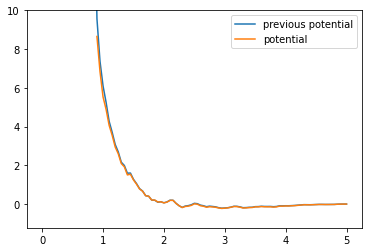

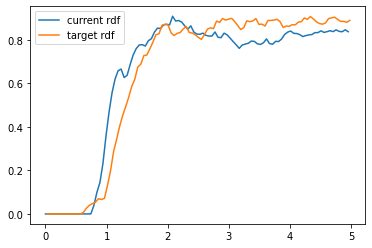

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


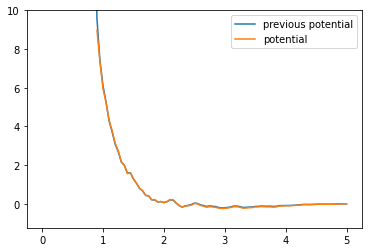

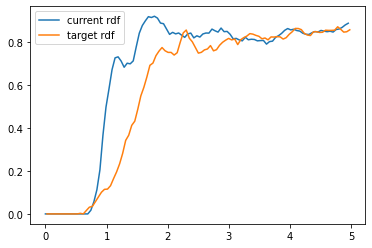

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


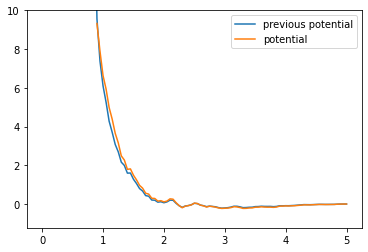

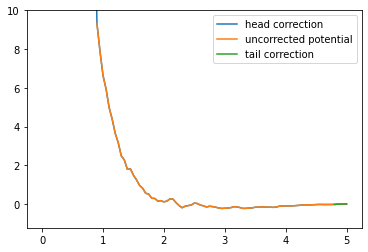

-------- Iteration 6 --------
Running state A on GPU
Launched HOOMD in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/A_2.0
Finished in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/A_2.0.
Running state B on GPU
Launched HOOMD in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/B_5.0
Finished in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/B_5.0.
Running state C on GPU
Launched HOOMD in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/C_9.0
Finished in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/C_9.0.


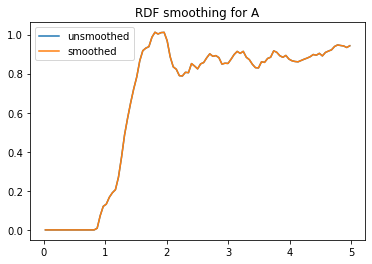

pair P-P, state A, iteration 6: 0.911187


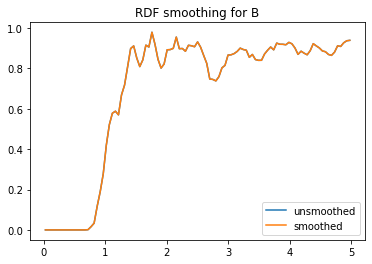

pair P-P, state B, iteration 6: 0.950272


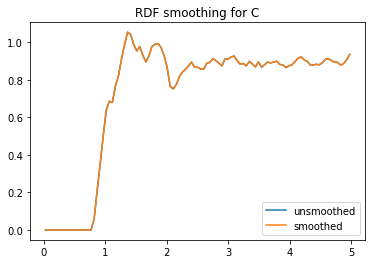

pair P-P, state C, iteration 6: 0.921914


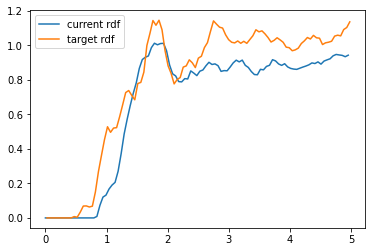

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


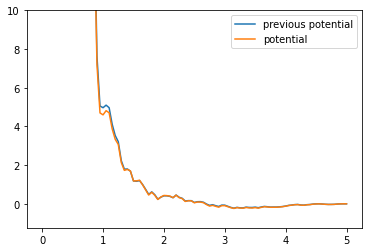

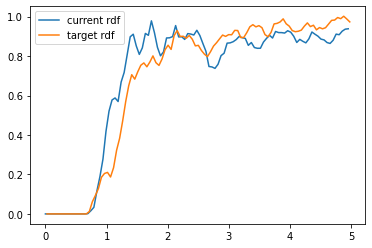

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


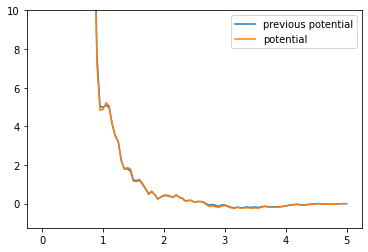

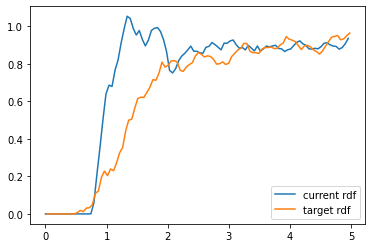

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


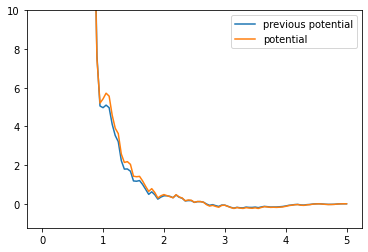

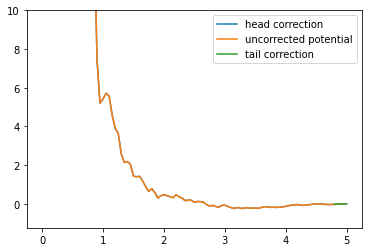

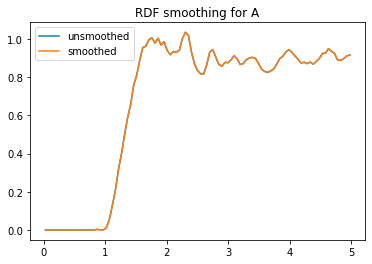

pair M-M, state A, iteration 6: 0.909663


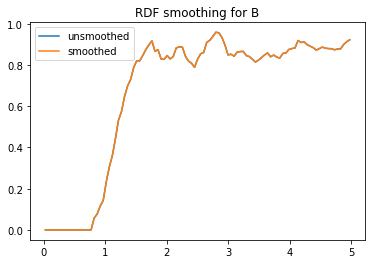

pair M-M, state B, iteration 6: 0.949498


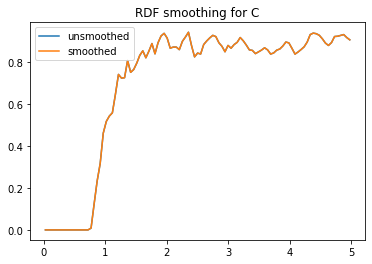

pair M-M, state C, iteration 6: 0.939083


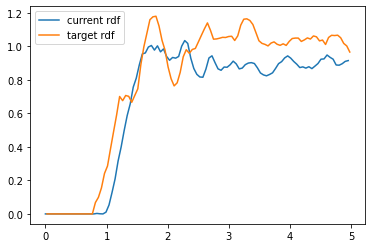

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


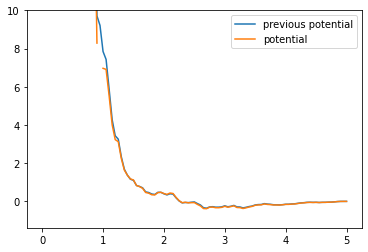

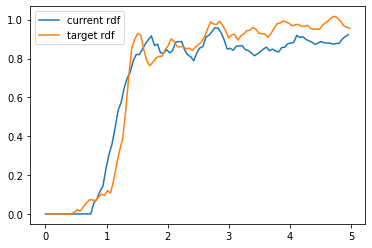

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


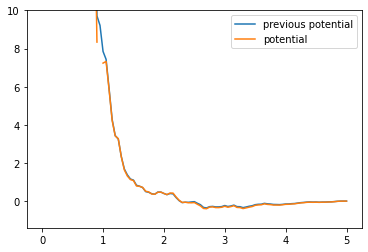

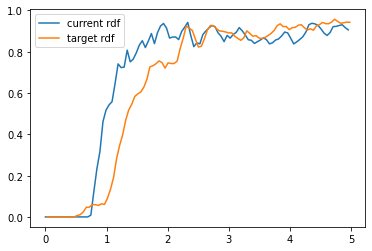

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


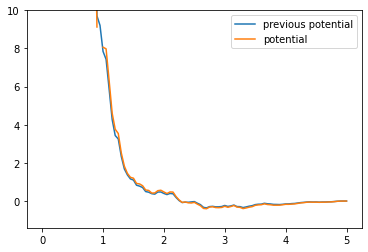

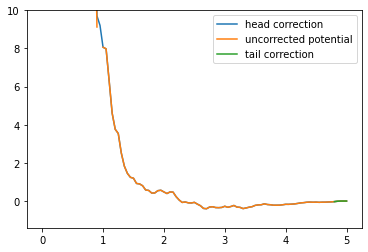

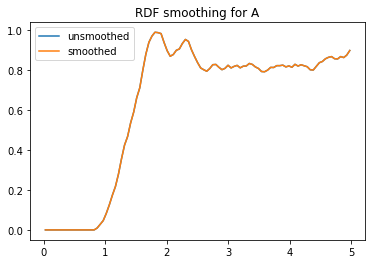

pair P-M, state A, iteration 6: 0.906671


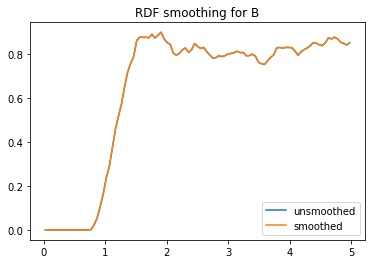

pair P-M, state B, iteration 6: 0.953287


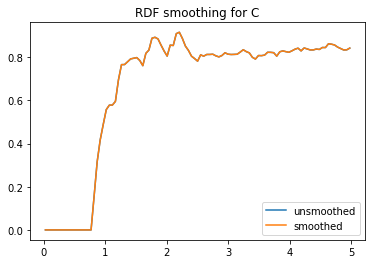

pair P-M, state C, iteration 6: 0.933167


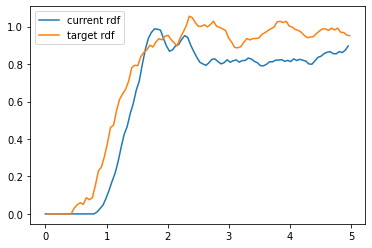

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


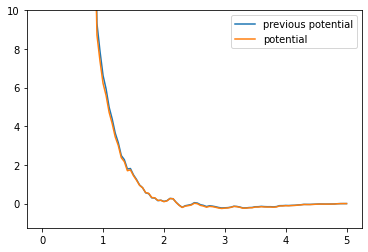

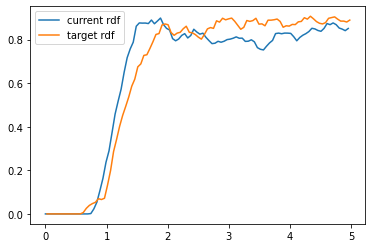

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


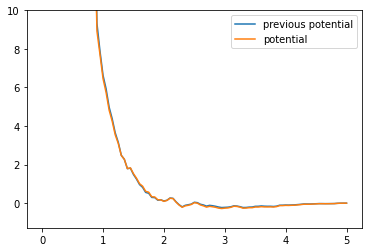

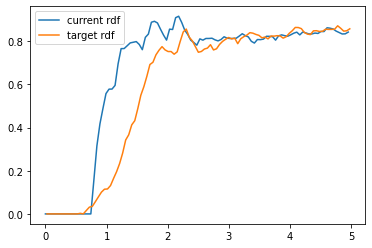

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


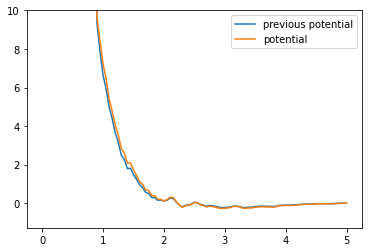

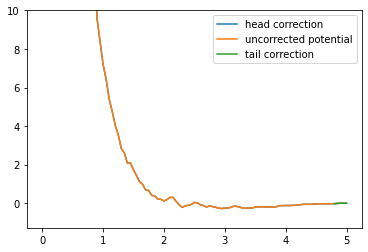

-------- Iteration 7 --------
Running state A on GPU
Launched HOOMD in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/A_2.0
Finished in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/A_2.0.
Running state B on GPU
Launched HOOMD in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/B_5.0
Finished in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/B_5.0.
Running state C on GPU
Launched HOOMD in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/C_9.0
Finished in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/C_9.0.


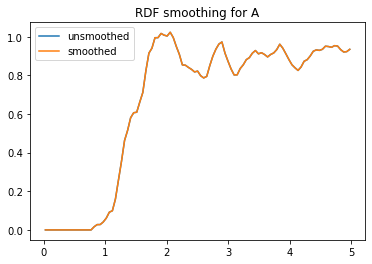

pair P-P, state A, iteration 7: 0.903710


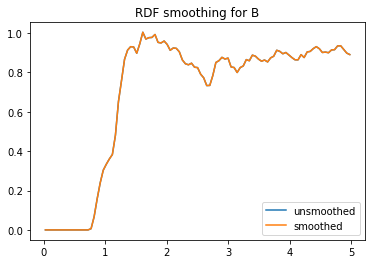

pair P-P, state B, iteration 7: 0.943617


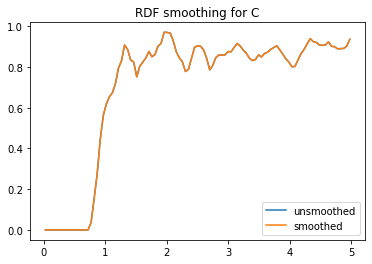

pair P-P, state C, iteration 7: 0.930094


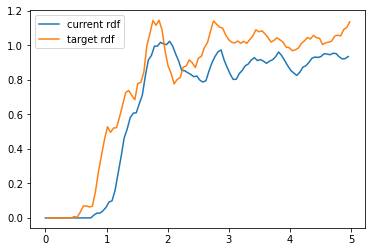

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


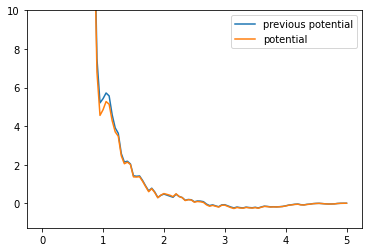

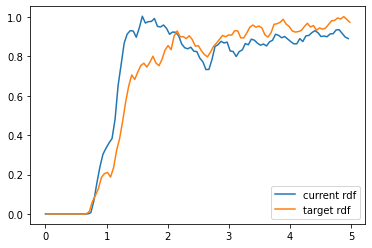

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


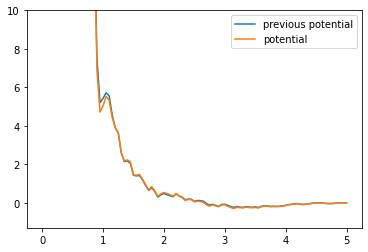

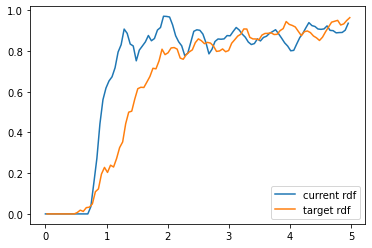

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


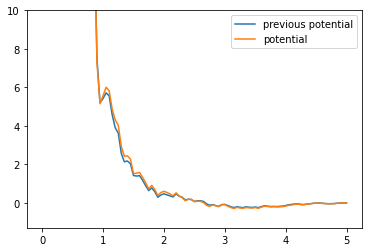

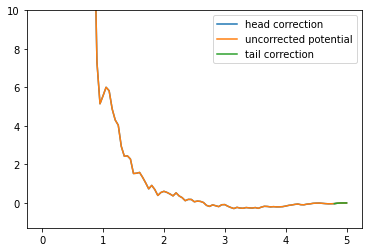

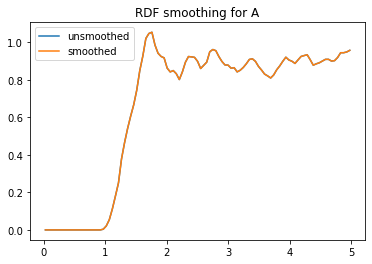

pair M-M, state A, iteration 7: 0.912908


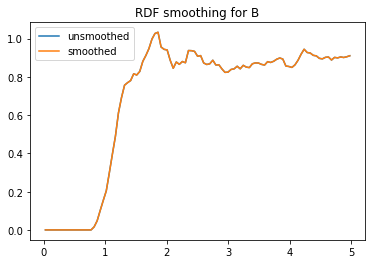

pair M-M, state B, iteration 7: 0.942114


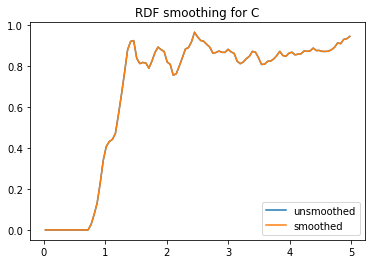

pair M-M, state C, iteration 7: 0.941681


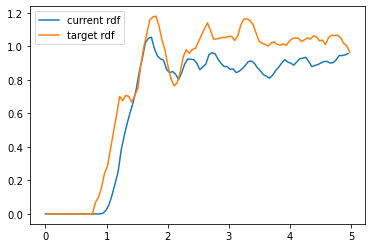

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


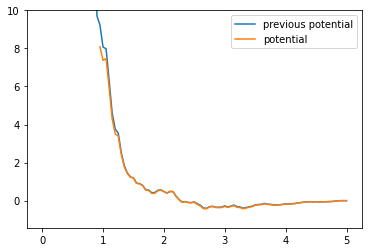

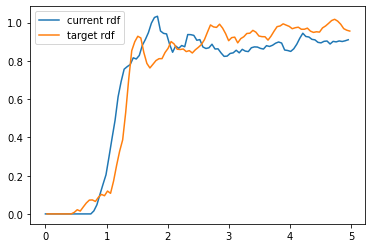

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


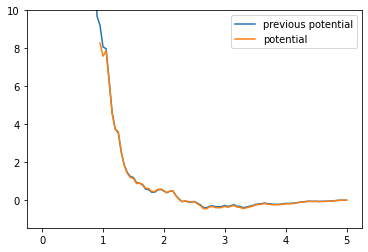

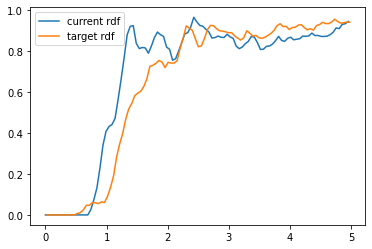

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


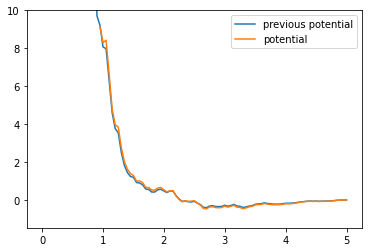

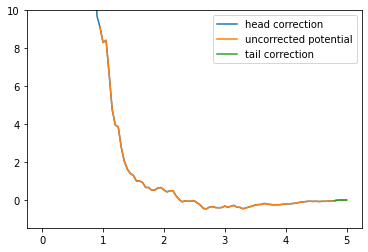

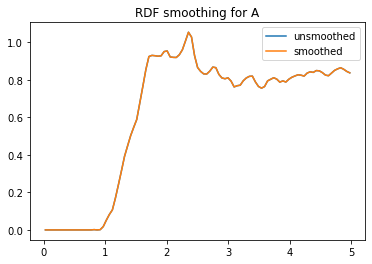

pair P-M, state A, iteration 7: 0.905597


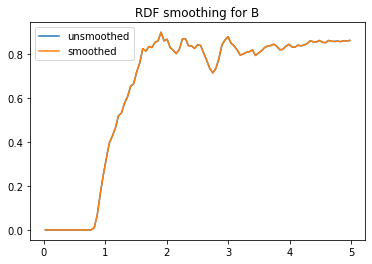

pair P-M, state B, iteration 7: 0.963641


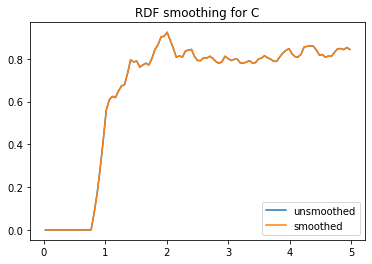

pair P-M, state C, iteration 7: 0.934435


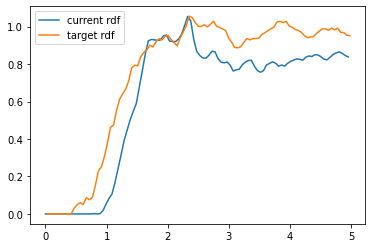

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


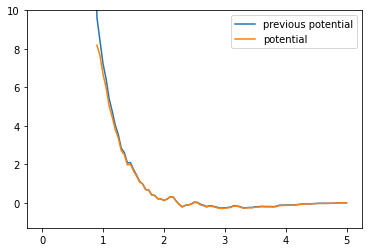

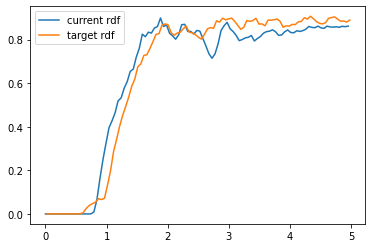

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


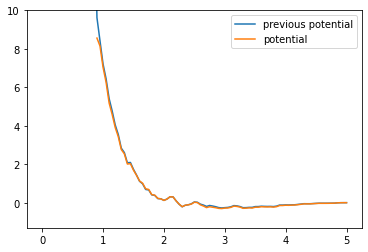

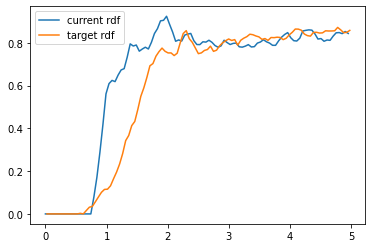

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


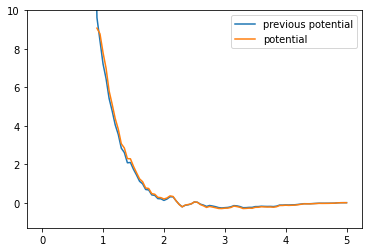

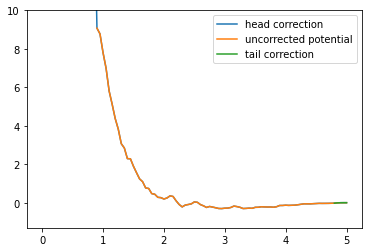

-------- Iteration 8 --------
Running state A on GPU
Launched HOOMD in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/A_2.0
Finished in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/A_2.0.
Running state B on GPU
Launched HOOMD in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/B_5.0
Finished in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/B_5.0.
Running state C on GPU
Launched HOOMD in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/C_9.0
Finished in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/C_9.0.


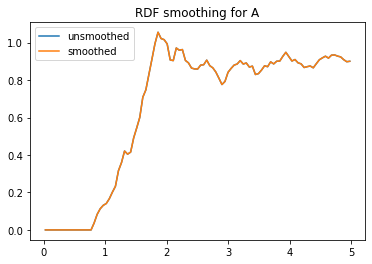

pair P-P, state A, iteration 8: 0.900771


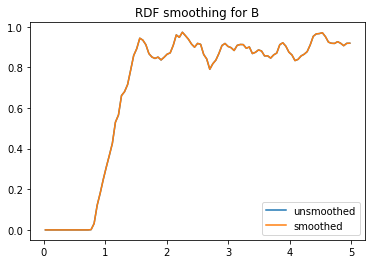

pair P-P, state B, iteration 8: 0.958268


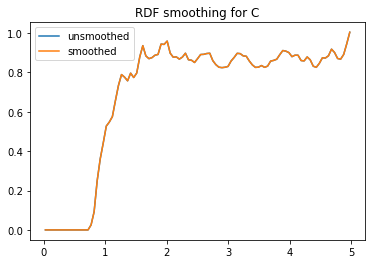

pair P-P, state C, iteration 8: 0.938342


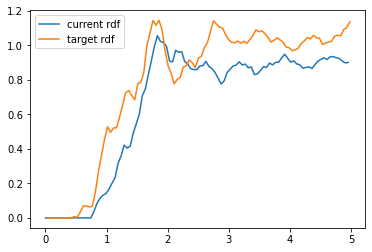

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


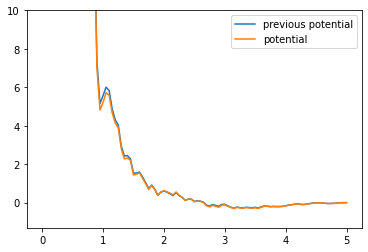

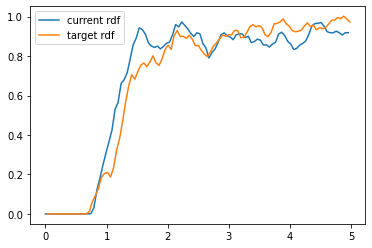

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


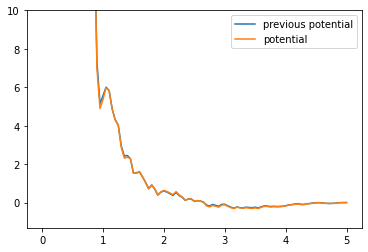

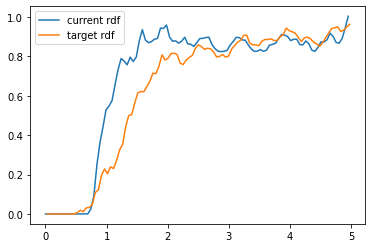

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


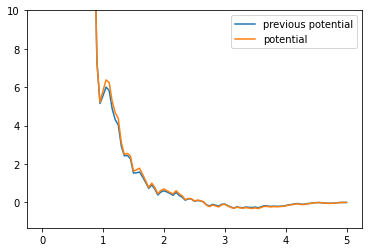

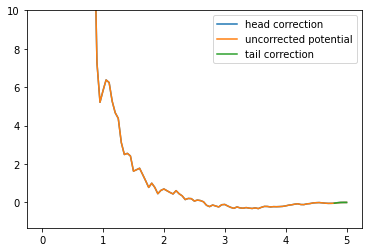

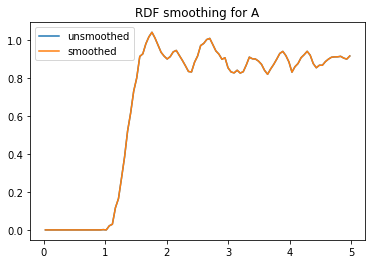

pair M-M, state A, iteration 8: 0.906160


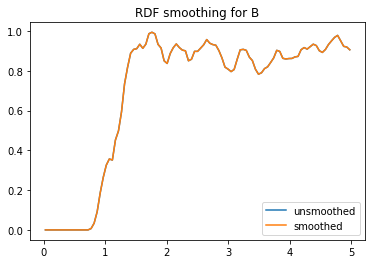

pair M-M, state B, iteration 8: 0.948427


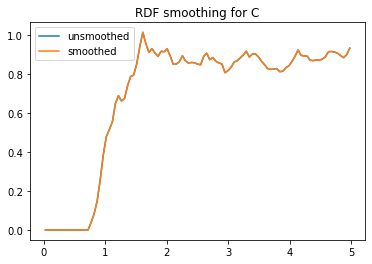

pair M-M, state C, iteration 8: 0.933363


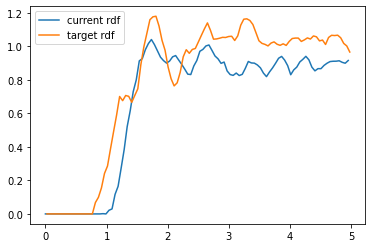

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


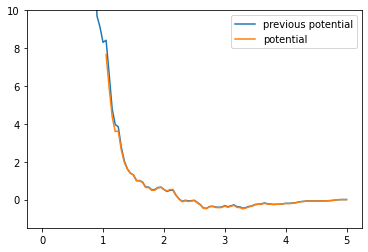

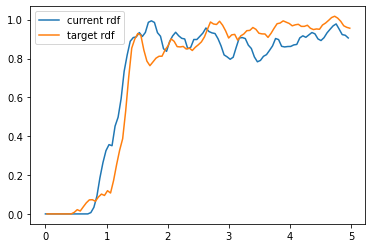

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


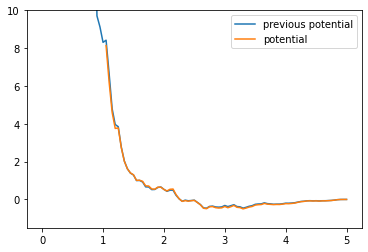

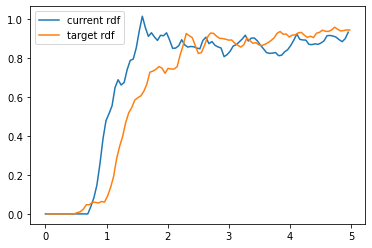

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


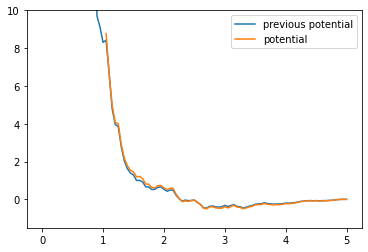

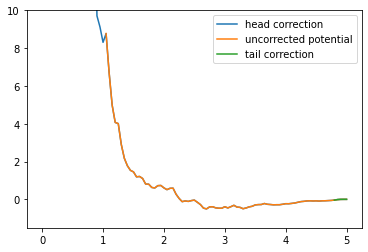

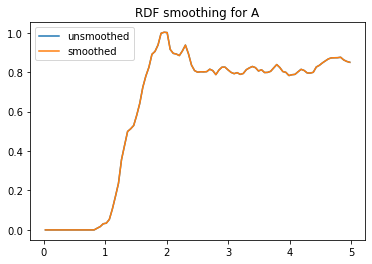

pair P-M, state A, iteration 8: 0.898111


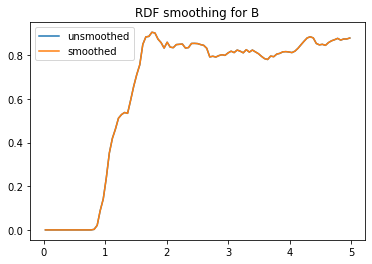

pair P-M, state B, iteration 8: 0.964154


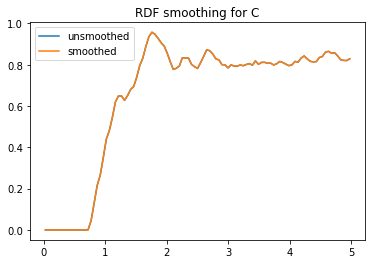

pair P-M, state C, iteration 8: 0.937286


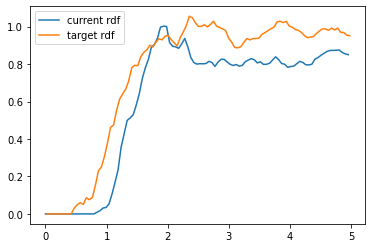

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


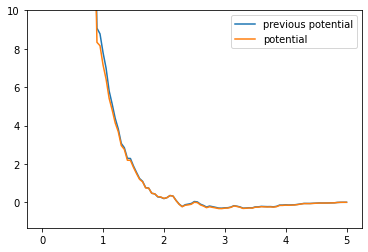

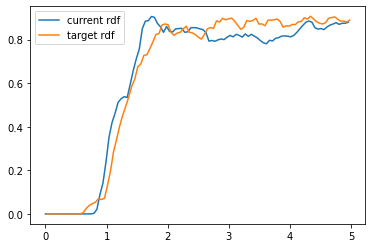

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


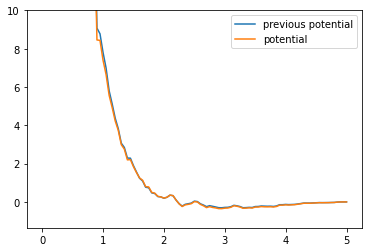

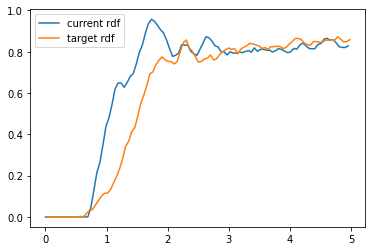

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


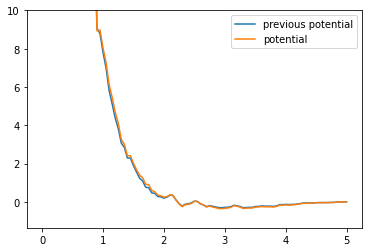

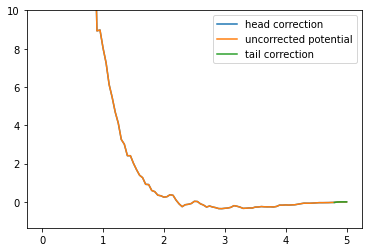

-------- Iteration 9 --------
Running state A on GPU
Launched HOOMD in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/A_2.0
Finished in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/A_2.0.
Running state B on GPU
Launched HOOMD in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/B_5.0
Finished in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/B_5.0.
Running state C on GPU
Launched HOOMD in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/C_9.0
Finished in /home/chris/cme/forks/msibi/msibi/tutorials/peek/states/C_9.0.


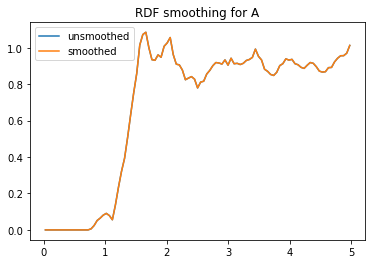

pair P-P, state A, iteration 9: 0.908233


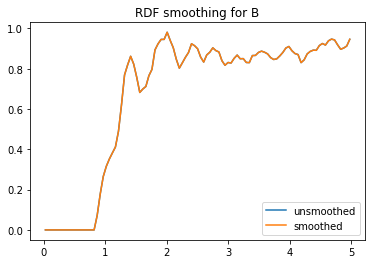

pair P-P, state B, iteration 9: 0.953901


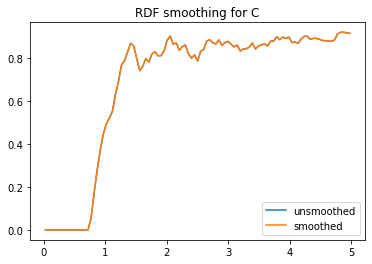

pair P-P, state C, iteration 9: 0.945302


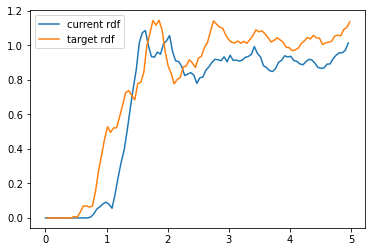

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


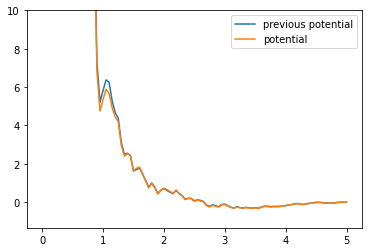

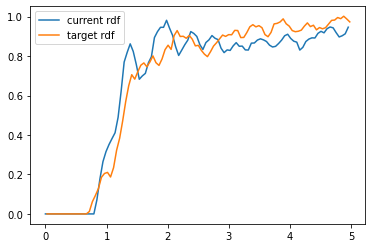

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


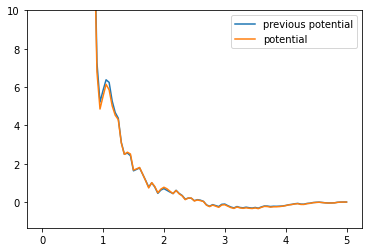

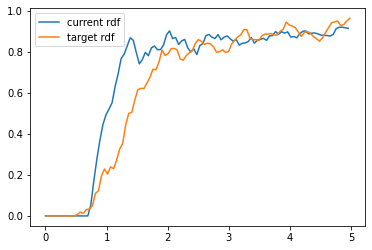

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


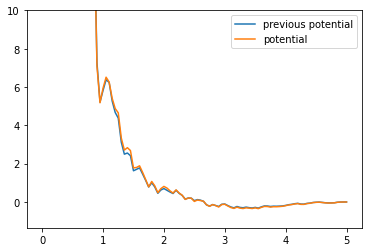

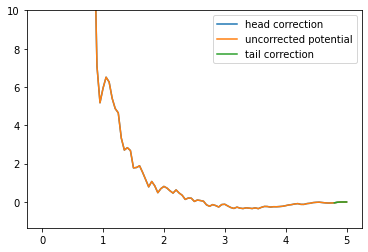

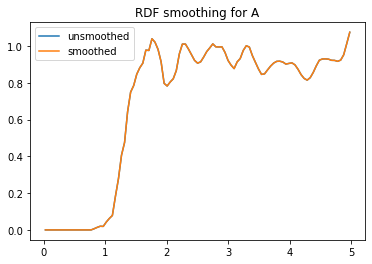

pair M-M, state A, iteration 9: 0.920988


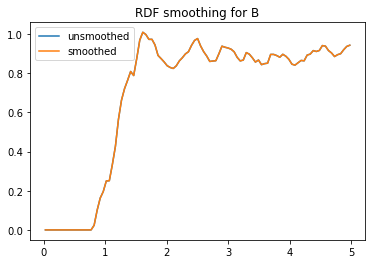

pair M-M, state B, iteration 9: 0.948238


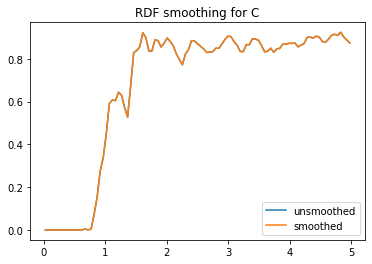

pair M-M, state C, iteration 9: 0.940867


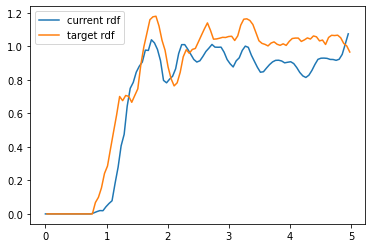

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


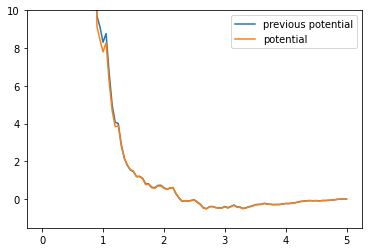

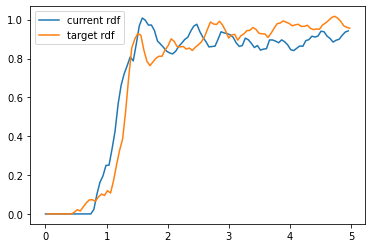

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


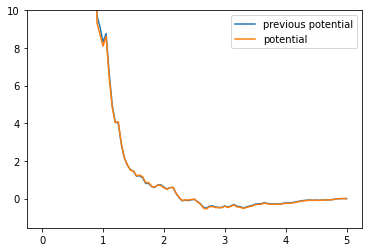

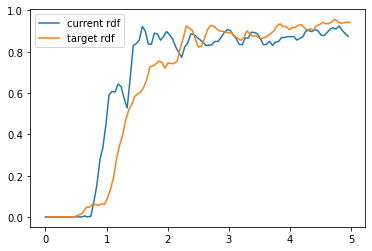

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


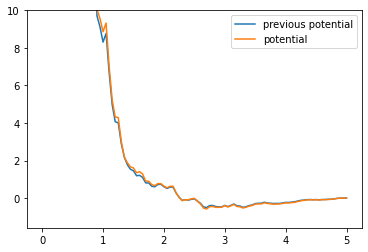

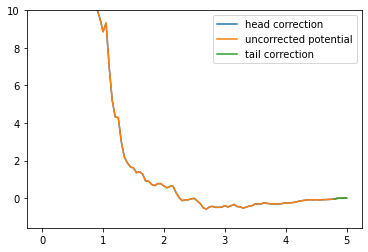

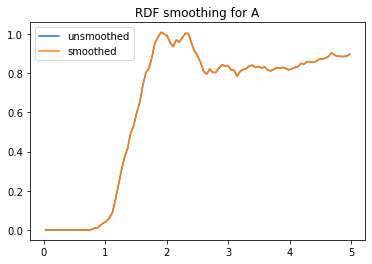

pair P-M, state A, iteration 9: 0.909225


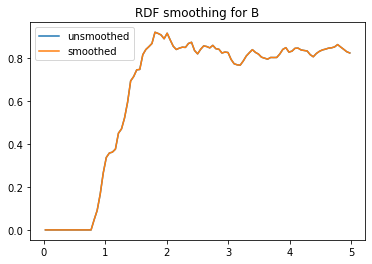

pair P-M, state B, iteration 9: 0.960994


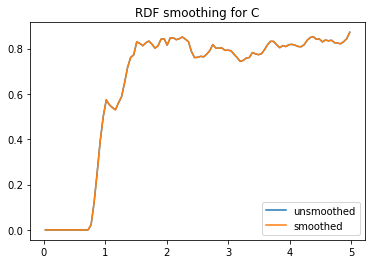

pair P-M, state C, iteration 9: 0.936614


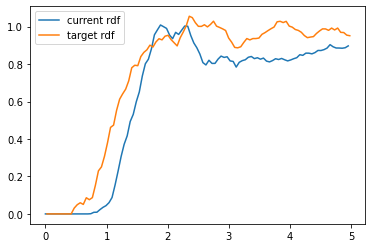

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


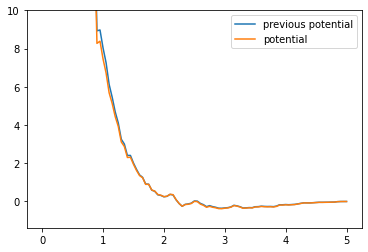

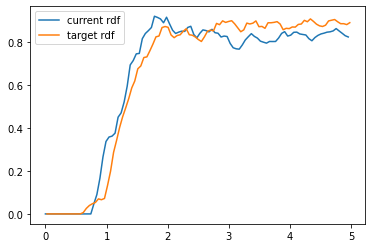

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


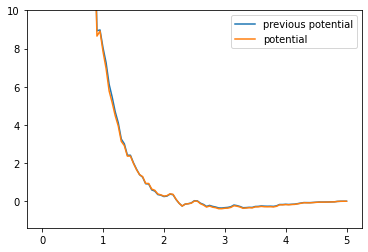

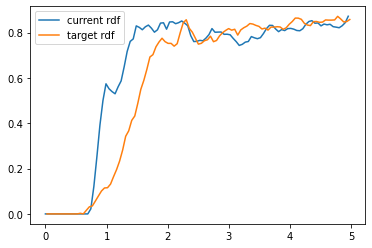

/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: invalid value encountered in true_divide
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)
/home/chris/cme/forks/msibi/msibi/pair.py:175: RuntimeWarning: divide by zero encountered in log
  kT * alpha * np.log(current_rdf[:,1] / target_rdf[:,1]) / len(self._states)


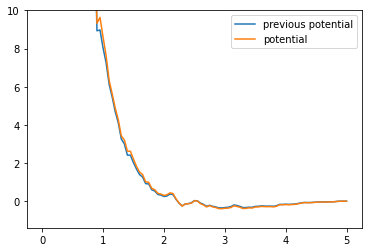

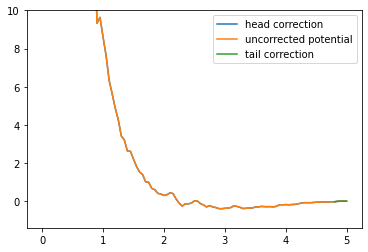

In [10]:
opt.optimize(n_iterations=10, engine='hoomd')

In [11]:
import matplotlib.pyplot as plt
import numpy as np

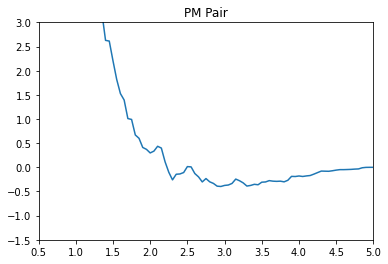

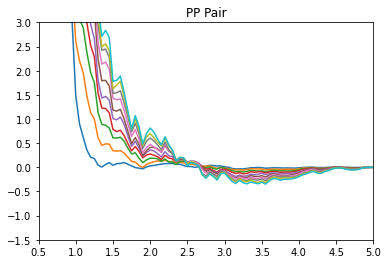

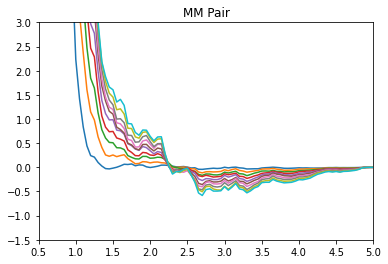

In [16]:
%matplotlib inline
for step in range(0, opt.n_iterations):
    plt.ylim([-1.5,3])
    plt.xlim([0.5,5])
    plt.title("MSIBI potentials by iteration")

    step_pot = np.loadtxt(f'potentials/step{step}.pot.P-M.txt')
    plt.plot(step_pot[:,0],step_pot[:,1], label=f'step {step}')
    
plt.title("PM Pair")
#plt.legend()
plt.show()

for step in range(0, opt.n_iterations):
    plt.ylim([-1.5,3])
    plt.xlim([0.5,5])
    plt.title("MSIBI potentials by iteration")

    step_pot = np.loadtxt(f'potentials/step{step}.pot.P-P.txt')
    plt.plot(step_pot[:,0],step_pot[:,1], label=f'step {step}')

plt.title("PP Pair")
#plt.legend()
plt.show()

for step in range(0, opt.n_iterations):
    plt.ylim([-1.5,3])
    plt.xlim([0.5,5])
    plt.title("MSIBI potentials by iteration")

    step_pot = np.loadtxt(f'potentials/step{step}.pot.M-M.txt')
    plt.plot(step_pot[:,0],step_pot[:,1], label=f'step {step}')

plt.title("MM Pair")
#plt.legend()
plt.show()

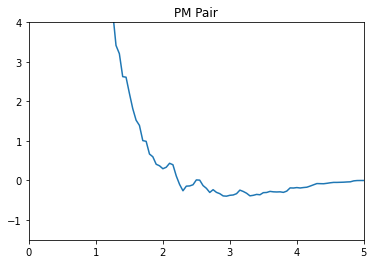

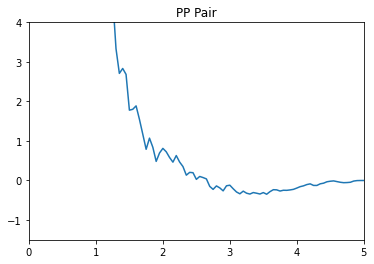

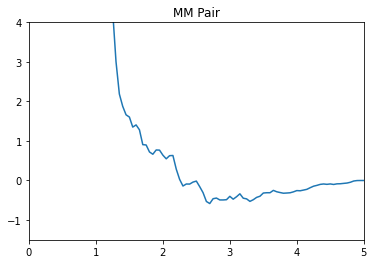

In [19]:
%matplotlib inline
for step in range(opt.n_iterations - 1, opt.n_iterations):
    plt.ylim([-1.5,4])
    plt.xlim([0,5])
    plt.title("MSIBI potentials by iteration")

    step_pot = np.loadtxt(f'potentials/step{step}.pot.P-M.txt')
    plt.plot(step_pot[:,0],step_pot[:,1], label=f'step {step}')
    
plt.title("PM Pair")
#plt.legend()
plt.show()

for step in range(opt.n_iterations - 1, opt.n_iterations):
    plt.ylim([-1.5,4])
    plt.xlim([0,5])
    plt.title("MSIBI potentials by iteration")

    step_pot = np.loadtxt(f'potentials/step{step}.pot.P-P.txt')
    plt.plot(step_pot[:,0],step_pot[:,1], label=f'step {step}')

plt.title("PP Pair")
#plt.legend()
plt.show()

for step in range(opt.n_iterations - 1, opt.n_iterations):
    plt.ylim([-1.5,4])
    plt.xlim([0,5])
    plt.title("MSIBI potentials by iteration")

    step_pot = np.loadtxt(f'potentials/step{step}.pot.M-M.txt')
    plt.plot(step_pot[:,0],step_pot[:,1], label=f'step {step}')

plt.title("MM Pair")
#plt.legend()
plt.show()